# DATA ANALYSIS

In [62]:
%pip install mplcursors 

Note: you may need to restart the kernel to use updated packages.


In [63]:
from gensim.models import word2vec
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import umap
import pacmap
import numpy as np
import csv
import matplotlib.pyplot as plt
import json
import re
from matplotlib.colors import Normalize
import mplcursors


In [64]:
with open('../Data/sequences.csv', 'r') as f:
    reader = csv.reader(f)
    sequences = list(reader)

In [65]:
f = open('../Data/data.json')
data = json.load(f)

a = open('../Data/added_data.json')
added_data = json.load(a)

In [66]:
model= word2vec.Word2Vec.load('../Data/Models/model_5e_100d_5w.model')

In [67]:
# Create a dictionary to map addresses to their corresponding embeddings
journey_embeddings = {}
for journey in sequences:
    for place in journey:
        try:
            journey_id = place  # Convert the journey list to a tuple to use as a dictionary key
            journey_embeddings[journey_id] = model.wv[journey_id]
        except KeyError:
            # Handle cases where the journey is not present in the Word2Vec model
            pass

# Convert dictionary to numpy array
X = np.array(list(journey_embeddings.values()))

# Create a list of all addresses
journey_ids = list(journey_embeddings.keys())

# Create a dictionary mapping addresses to their index in the numpy array
journey_idx = {journey_id: idx for idx, journey_id in enumerate(journey_ids)}

In [68]:
X = model.wv.vectors

#pacmap
embedding = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_pacmap = embedding.fit_transform(X, init="pca")

# tsne
def tsne_plot(X):
    X=np.array(X)
    proj = TSNE(perplexity=20).fit_transform(X)
    return proj
proj_tsne=tsne_plot(X)

# UMAP 
proj_umap = umap.UMAP(n_components=2, n_neighbors=20, metric='cosine').fit_transform(X)

# pca 
pca = PCA(n_components=2)
proj_pca=pca.fit_transform(X)


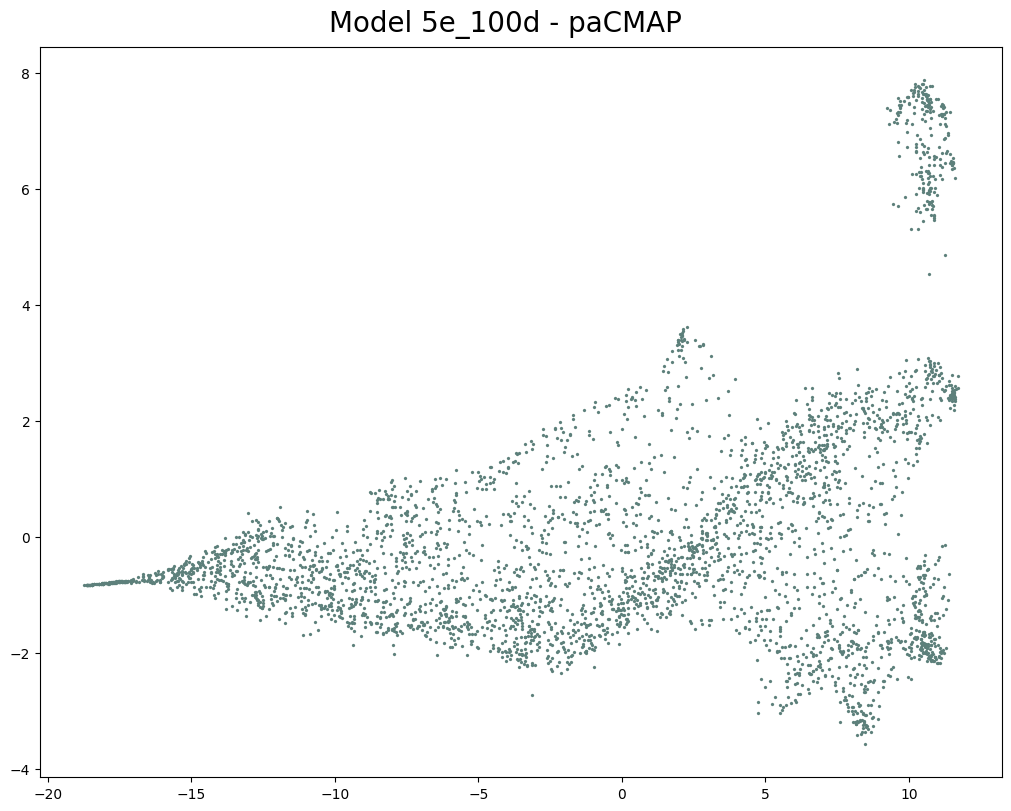

In [69]:

fig, ax = plt.subplots(1, 1, figsize=(10, 8), layout="constrained")

#Plot all city
plt.scatter(
    [proj_pacmap[journey_idx[journey_id]][0] for journey_id in journey_ids],
    [proj_pacmap[journey_idx[journey_id]][1] for journey_id in journey_ids],
    lw=0.1, s=5, marker='o', c="#5D807B"
)

fig.suptitle('Model 5e_100d - paCMAP', fontsize=20)

plt.show()

_____________________________________________________________________

# COUNT

In [70]:
counts_to_labels = {100: '0-100', 1000: '101-1000', 5000: '1001-5000', 10000: '5001-10000', 50000: '10000-50000', 100000: '50001-100000', 100001: '100000+'}

In [71]:
address_count_seq = {}
for seq in sequences:
    for place in seq:
        if place in address_count_seq:
            address_count_seq[place] += 1
        else:
            address_count_seq[place] = 1


from collections import Counter

# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
address_counts = Counter(address_count_seq.values())

# Sort the counts by their keys (number of mentions), in descending order
sorted_counts = sorted(address_counts.items(), key=lambda x: x[0], reverse=True)

In [72]:

address_cluster_count = {}

for address in address_count_seq.keys():
      count = address_count_seq[address]
      if 0 <= count <= 100:
         address_cluster_count[address] = 100
      elif 101 <= count <= 1000:
         address_cluster_count[address] = 1000
      elif 1001 <= count <= 5000:
         address_cluster_count[address] = 5000
      elif 5001 <= count <= 10000:
         address_cluster_count[address] = 10000
      elif 10001 <= count <= 50000:
         address_cluster_count[address] = 50000
      elif 50001 <= count <= 100000:
         address_cluster_count[address] = 100000
      elif 100001 <= count:
         address_cluster_count[address] = 100001
      else:
         print("address was: ", address)
         address_cluster_count[address] = 0 


In [73]:
from collections import Counter

# Count occurrences of each zip code
count_counts = Counter(address_cluster_count.values())

# Print the zip code counts
for occurrence, count in sorted(count_counts.items()):
    print(f"Count {occurrence}: {count} occurrences")

Count 100: 4063 occurrences
Count 1000: 833 occurrences
Count 5000: 265 occurrences
Count 10000: 57 occurrences
Count 50000: 76 occurrences
Count 100000: 22 occurrences
Count 100001: 9 occurrences


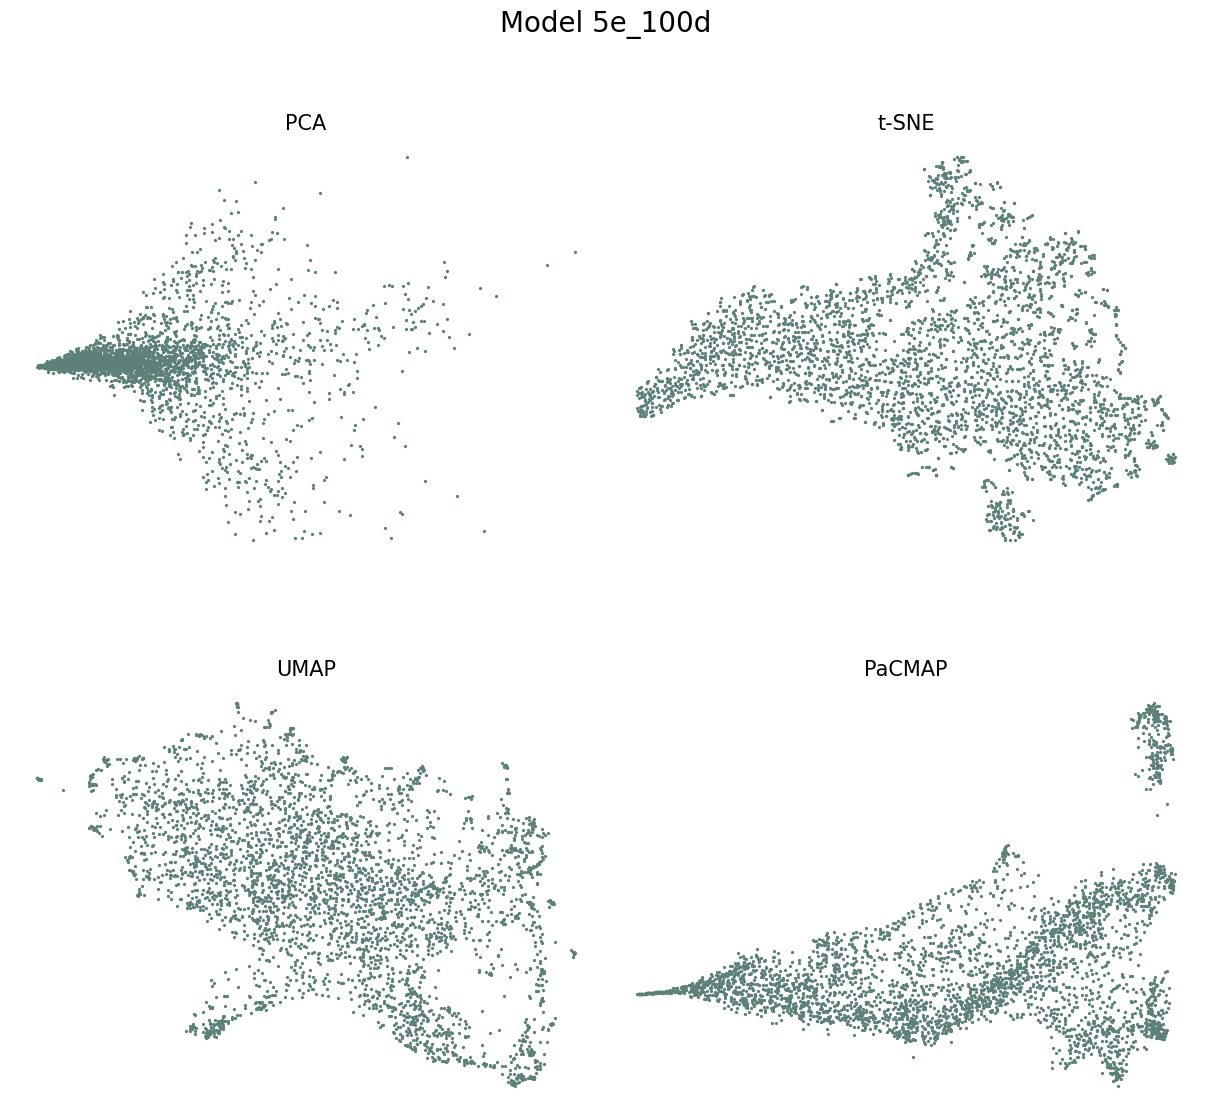

In [74]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)
        col.scatter(
            [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
            [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
            lw=0.1, s=5, c='#5D807B'
        )
        s += 1
        col.axis('off')

# Custom legend
fig.suptitle('Model 5e_100d', fontsize=20, y=1.1)
plt.show()


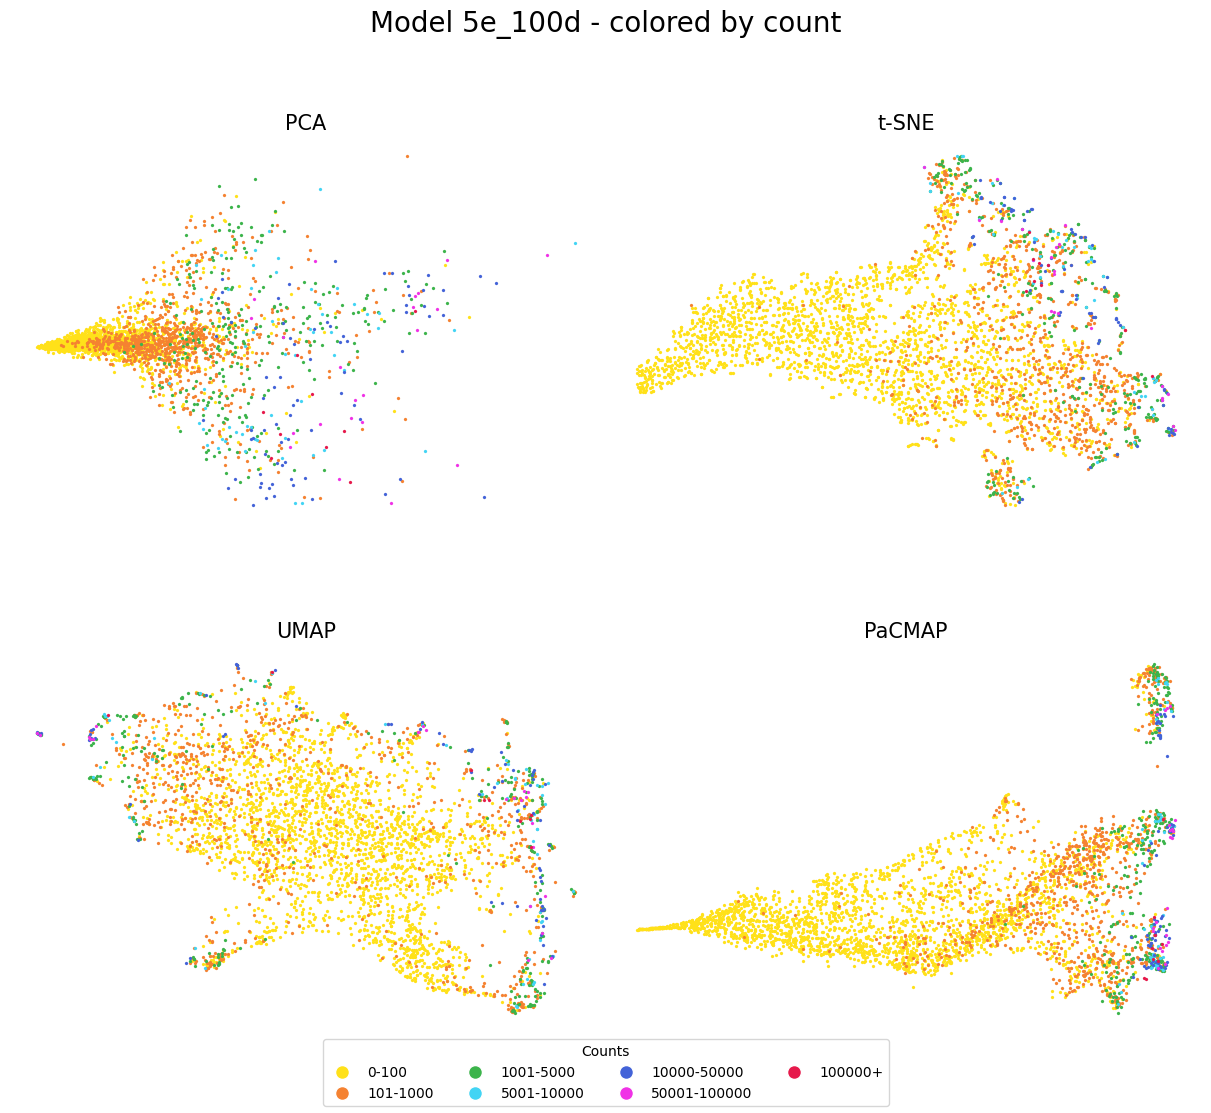

In [75]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )
        #  # Add labels to stations makes it impossible to read 
        #     for journey_id in relevant_journeys_zip:
        #         x_coord = xs[s][journey_idx[journey_id]][0]
        #         y_coord = xs[s][journey_idx[journey_id]][1]
        #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
            
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


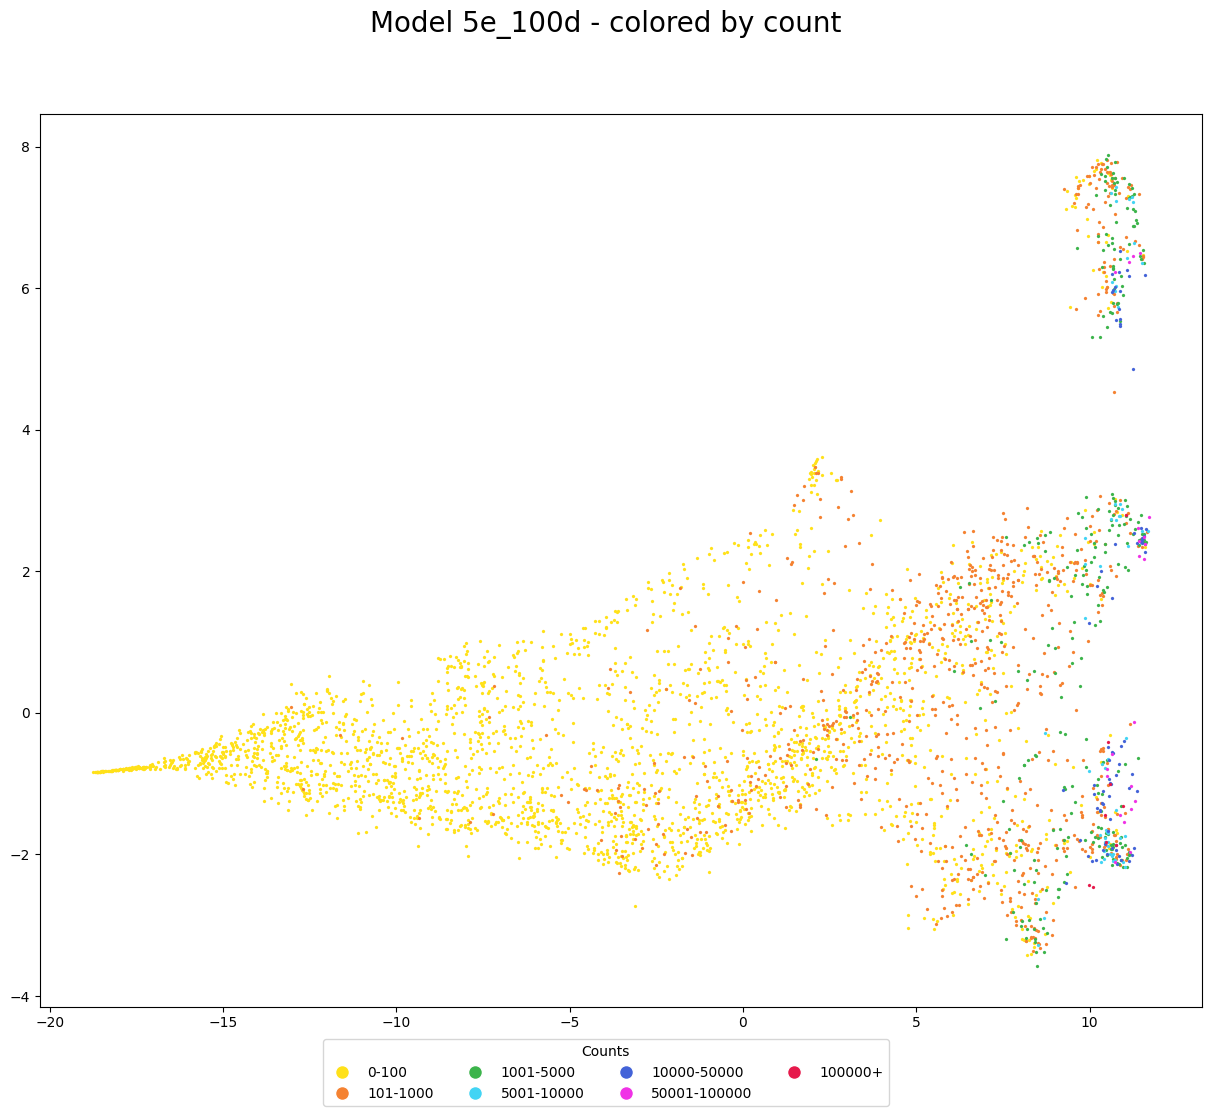

In [76]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )
# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


### Metro

In [77]:
stations_with_metro = []
for location in journey_ids:
    if '(Metro)' in location:
        stations_with_metro.append(location)

City = ["Nørrebro St. (Metro)", "Nørrebros Runddel St. (Metro)", "Nuuks Plads St. (Metro)", "Axelm Møllers Have St. (Metro)", 
      "Frederiksberg St. (Metro)", "Frederiksberg Allé St. (Metro)", "Enghave Plads St. (Metro)", "København H St. (Metro)", "København H (Metro)",
      "Rådhuspladsen St. (Metro)", "Gammel Strand St. (Metro)", "Kongens Nytorv St. (Metro)", "Marmorkirken St. (Metro)",
       "Østerport St. (Metro)", "Trianglen St. (Metro)", "Poul Henningsens Plads St. (Metro)", "Vibenhus Runddel St. (Metro)",
        "Skjolds Plads St. (Metro)", "Nordhavn St. (Metro)", "Orientkaj St. (Metro)"]

M1_2 = ["Vanløse St. (Metro)", "Flintholm St. (Metro)", "Lindevang St. (Metro)", "Fasanvej St. (Metro)", 
      "Frederiksberg St. (Metro)", "Forum St. (Metro)", "Nørreport St. (Metro)", "Kongens Nytorv St. (Metro)",
      "Christianshavn St. (Metro)"]
M1 = ["Islands Brygge St. (Metro)", "DR Byen St. (Metro)", "Sundby St. (Metro)", "Bella Center St. (Metro)", "Ørestad St. (Metro)", "Vestamager St. (Metro)"]
M2 = ["Amagerbro St. (Metro)", "Lergravsparken St. (Metro)", "Øresund St. (Metro)",
      "Amager Strand St. (Metro)", "Femøren St. (Metro)", "Kastrup St. (Metro)", "Københavns Lufthavn St. (Metro)"]

#color_to_metro= {"City": "Red", "M2": "Yellow", "M1": "Green", "M1_2": "Purple", "Metro": "Black"}
color_to_metro= {"Red": "City" , "Yellow":  "M2", "Green": "M1", "Purple": "M1_2"}

# Create the plots

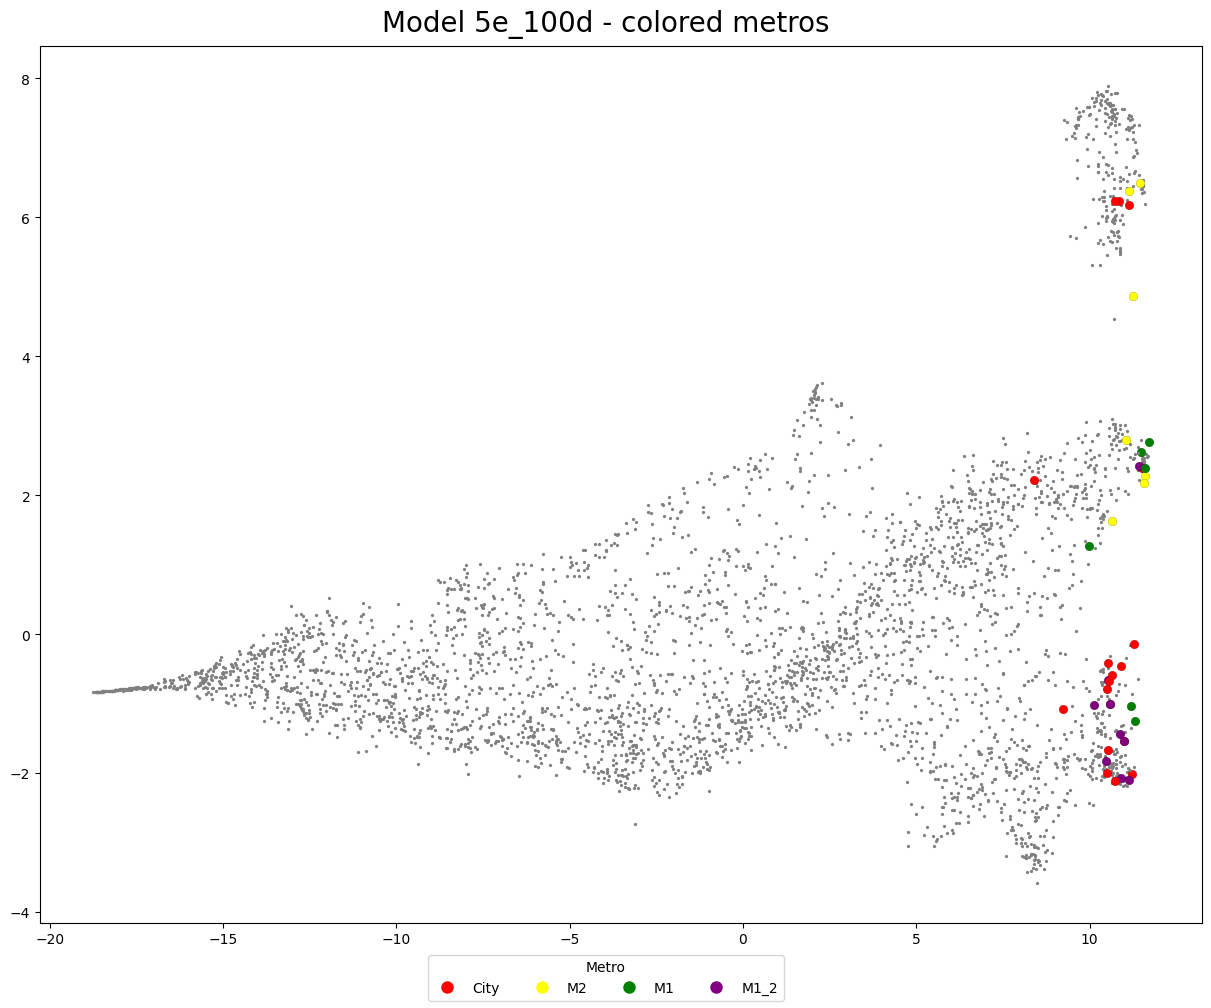

In [78]:
# Define color palette for zip codes
unique_metroes = color_to_metro.keys()
color_palette = ["Red", "Yellow", "Green", "Purple"]
colors = {}
for idx, metro in enumerate(unique_metroes):
    colors[metro] = color_palette[idx]


fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained")


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    #plot all without metro
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id not in stations_with_metro],
        lw=0.1, s=5, label=current_count_code, facecolor='grey'
    )

    # plt.scatter(
    #     [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in stations_with_metro],
    #     lw=0.1, s=40, label=current_count_code, edgecolors='black', facecolor='none'
    # )

    #Plot all city
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in City],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in City],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Red', label="City"
    )

    #Plot all m1_2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1_2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Purple', label="M1_2"
    )

    #Plot all m2
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M2],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M2],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Yellow', label="M2"
    )

      #Plot all m1
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip if journey_id in M1],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip if journey_id in M1],
        lw=0.1, s=40, marker='o', edgecolor='black', facecolor='Green', label="M1"
    )


# for journey_id in stations_with_metro:
#     x_coord = proj_pacmap[journey_idx[journey_id]][0]
#     y_coord = proj_pacmap[journey_idx[journey_id]][1]
#     plt.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=colors[metro], label=color_to_metro[metro]) for metro in unique_metroes]
fig.legend(handles= handles, loc="outside lower center", ncol=5, title='Metro')
fig.suptitle('Model 5e_100d - colored metros', fontsize=20)

plt.show()

_____________________________________________________________________

# ZIPCODES

In [79]:
def getZip(info):
    pattern_zip = '\d{4}'
    pattern_denmark = 'anmark'
    match_zip = re.search(pattern_zip, info)
    match_denmark = re.search(pattern_denmark, info)
    if match_zip is not None and match_denmark is not None:
        return match_zip.group()
    else :
        return
    

In [80]:
pattern = r'\d.*'

def get_modified (location):
    location = (re.sub(pattern, '', location)).strip()
    if location == '':
        return
    if location[-1] == '(':
        location = location[:-1]
    if location == 'Zoo':
        location = "Zoologisk Have"
    return location


In [81]:
address_cluster_zips = {}
zip_to_label = {'1000': 'Kbh K', '1700': 'Vesterbro', '2000': 'Frederiksberg', '2100': 'Østerbro', '2200': 'Nørrebro', 
                '2300': 'Kbh S', '2400': 'Kbh NV', '2500': 'Valby', '2600': 'Glostrup', '2700': 'Brønshøj', '2800': 'Lyngby', '2900': 'Hellerup', '2770': 'Kastrup'}
zip_to_label_clustered = {'2800': 'Nord', '1000': 'Midt', '2600': 'Vest', '2300' : 'Syd'}
wrong_addresses = []

In [82]:

for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address can be empty
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'
            else: 
                wrong_addresses.append(address) #go through later


#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip_code = getZip(added_data[address]['address'])
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                if 1000 <= zip <= 1499:
                    #Kbh K
                    address_cluster_zips[address] = '1000'
                elif 1500 <= zip <= 1799:
                    #Kbh V
                    address_cluster_zips[address] = '1700'
                elif zip == 2000:
                    #Frederiksberg C
                    address_cluster_zips[address] = '2000'
                elif 2000 < zip < 2200: #2150 er Nordhavn
                    #Østerbro
                    address_cluster_zips[address] = '2100'
                elif 2200 <= zip < 2300:
                    #København N (Nørrebro)
                    address_cluster_zips[address] = '2200'
                elif 2300 <= zip < 2400:
                    #Amager Kbh S
                    address_cluster_zips[address] = '2300'
                elif 2400 <= zip < 2500:
                    #Kbh NV
                    address_cluster_zips[address] = '2400'
                elif 2500 <= zip < 2600:
                    #Valby
                    address_cluster_zips[address] = '2500'
                elif 2600 <= zip < 2700:
                    #Glostrup
                    address_cluster_zips[address] = '2600'
                elif zip == 2770 or zip == 2791:
                    #Kastrup Dragør
                    address_cluster_zips[address] = '2770'
                elif 2700 <= zip < 2800:
                    #Brønshøj
                    address_cluster_zips[address] = '2700'
                elif 2800 <= zip < 2900:
                    #Lyngby
                    address_cluster_zips[address] = '2800'
                elif 2800 <= zip < 2900:
                    #Hellerup
                    address_cluster_zips[address] = '2900'

In [83]:
from collections import Counter

# Count occurrences of each zip code
zip_code_counts = Counter(address_cluster_zips.values())

# Print the zip code counts
for zip_code, count in zip_code_counts.items():
    print(f"Zip code {zip_code}: {count} addresses")

Zip code 2100: 3345 addresses
Zip code 2400: 3539 addresses
Zip code 1000: 3995 addresses
Zip code 2300: 6497 addresses
Zip code 2500: 2205 addresses
Zip code 1700: 2522 addresses
Zip code 2770: 2999 addresses
Zip code 2800: 413 addresses
Zip code 2000: 1921 addresses
Zip code 2200: 2916 addresses
Zip code 2700: 2554 addresses
Zip code 2600: 797 addresses


In [84]:
# New dictionary to store modified keys and their corresponding zip codes
modified_new_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_cluster_zips.items():
    new_address = get_modified(address)
    modified_new_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_1369/3659850241.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/mplcursors/_pick_info.py:55: UserWarning:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



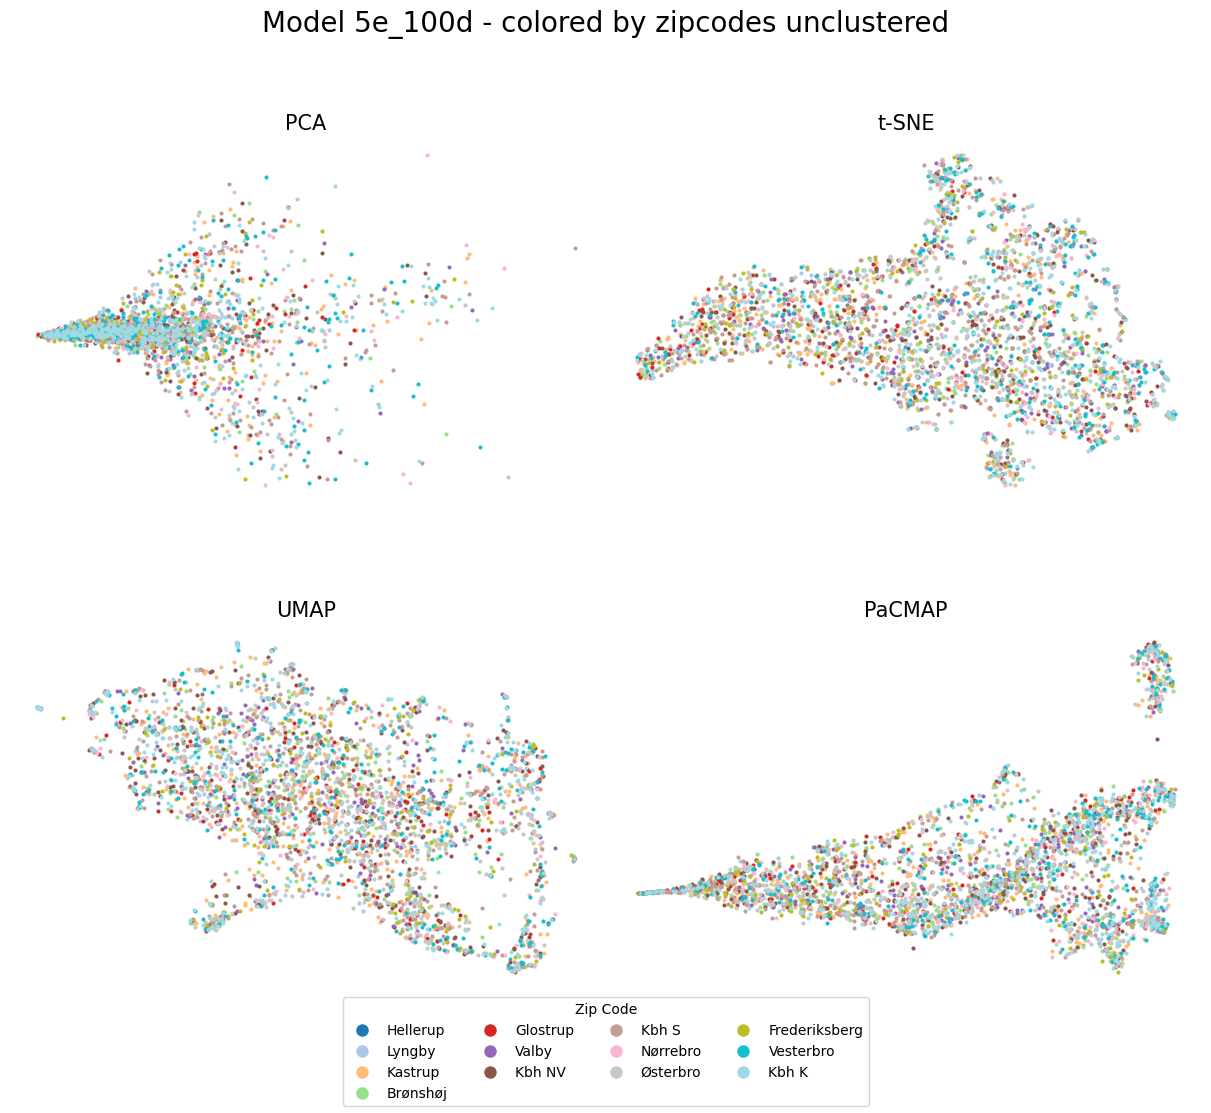

In [85]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label.keys(), reverse=True)
num_colors = len(unique_zip_codes) 
color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

# Create the plots
fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

#should be two times two
for row in ax:
    for col in row:
        #print("One plot")
        col.set_title(ts[s], fontsize=15)
        # # Filter journeys by field

        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_new_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=8, label=current_zip_code, c=zip_colors[current_zip_code]
            )
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes unclustered', fontsize=20, y=1.1)
plt.show()


### More clustered

In [86]:
#Nord, Midt, Vest, Syd
for address, info in data.items():
    if info is not None: 
        zip_code = getZip(info['address'])  # Extract zip code from address can be empty
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 4999: #for now removing all failed zipcodes in Jylland
                        if 1000 <= zip <= 1499:
                            #Kbh K
                            address_cluster_zips[address] = '1000'
                        elif 1500 <= zip <= 1799:
                            #Kbh V
                            address_cluster_zips[address] = '1000'
                        elif zip == 2000:
                            #Frederiksberg C
                            address_cluster_zips[address] = '1000'
                        elif 2000 < zip < 2200: #2150 er Nordhavn
                            #Østerbro
                            address_cluster_zips[address] = '1000'
                        elif 2200 <= zip < 2300:
                            #København N (Nørrebro)
                            address_cluster_zips[address] = '1000'
                        elif 2300 <= zip < 2400:
                            #Amager Kbh S
                            address_cluster_zips[address] = '2300'
                        elif 2400 <= zip < 2500:
                            #Kbh NV
                            address_cluster_zips[address] = '1000'
                        elif 2500 <= zip < 2600:
                            #Valby
                            address_cluster_zips[address] = '2300'
                        elif 2600 <= zip < 2700:
                            #Glostrup
                            address_cluster_zips[address] = '2600'
                        elif zip == 2770 or zip == 2791:
                            #Kastrup Dragør
                            address_cluster_zips[address] = '2300'
                        elif 2700 <= zip < 2800:
                            #Brønshøj
                            address_cluster_zips[address] = '1000'
                        elif 2800 <= zip < 2900:
                            #Lyngby
                            address_cluster_zips[address] = '2800'
                        elif 2800 <= zip < 2900:
                            #Hellerup
                            address_cluster_zips[address] = '2800'
            else: 
                wrong_addresses.append(address) #go through later


#run through the list of wrong addresses and try to find them in the added_data.json file to get the "correct" zipcode
for address in wrong_addresses:
    #find in json file
    if address in added_data:
        zip_code = getZip(added_data[address]['address'])
        if zip_code is not None:
            zip = int(zip_code)
            if 1000 <= zip <= 1499:
                #Kbh K
                address_cluster_zips[address] = '1000'
            elif 1500 <= zip <= 1799:
                #Kbh V
                address_cluster_zips[address] = '1000'
            elif zip == 2000:
                #Frederiksberg C
                address_cluster_zips[address] = '1000'
            elif 2000 < zip < 2200: #2150 er Nordhavn
                #Østerbro
                address_cluster_zips[address] = '1000'
            elif 2200 <= zip < 2300:
                #København N (Nørrebro)
                address_cluster_zips[address] = '1000'
            elif 2300 <= zip < 2400:
                #Amager Kbh S
                address_cluster_zips[address] = '2300'
            elif 2400 <= zip < 2500:
                #Kbh NV
                address_cluster_zips[address] = '1000'
            elif 2500 <= zip < 2600:
                #Valby
                address_cluster_zips[address] = '2300'
            elif 2600 <= zip < 2700:
                #Glostrup
                address_cluster_zips[address] = '2600'
            elif zip == 2770 or zip == 2791:
                #Kastrup Dragør
                address_cluster_zips[address] = '2300'
            elif 2700 <= zip < 2800:
                #Brønshøj
                address_cluster_zips[address] = '1000'
            elif 2800 <= zip < 2900:
                #Lyngby
                address_cluster_zips[address] = '2800'
            elif 2800 <= zip < 2900:
                #Hellerup
                address_cluster_zips[address] = '2800'

In [87]:
# New dictionary to store modified keys and their corresponding zip codes
modified_address_cluster_zips = {}

# Iterate through the keys, apply regex operation, and update the new dictionary
for address, zipcode in address_cluster_zips.items():
    new_address = get_modified(address)
    modified_address_cluster_zips[new_address] = zipcode


/var/folders/z3/0j97vknj4696wz9q6_jg32240000gn/T/ipykernel_1369/2470452665.py:4: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



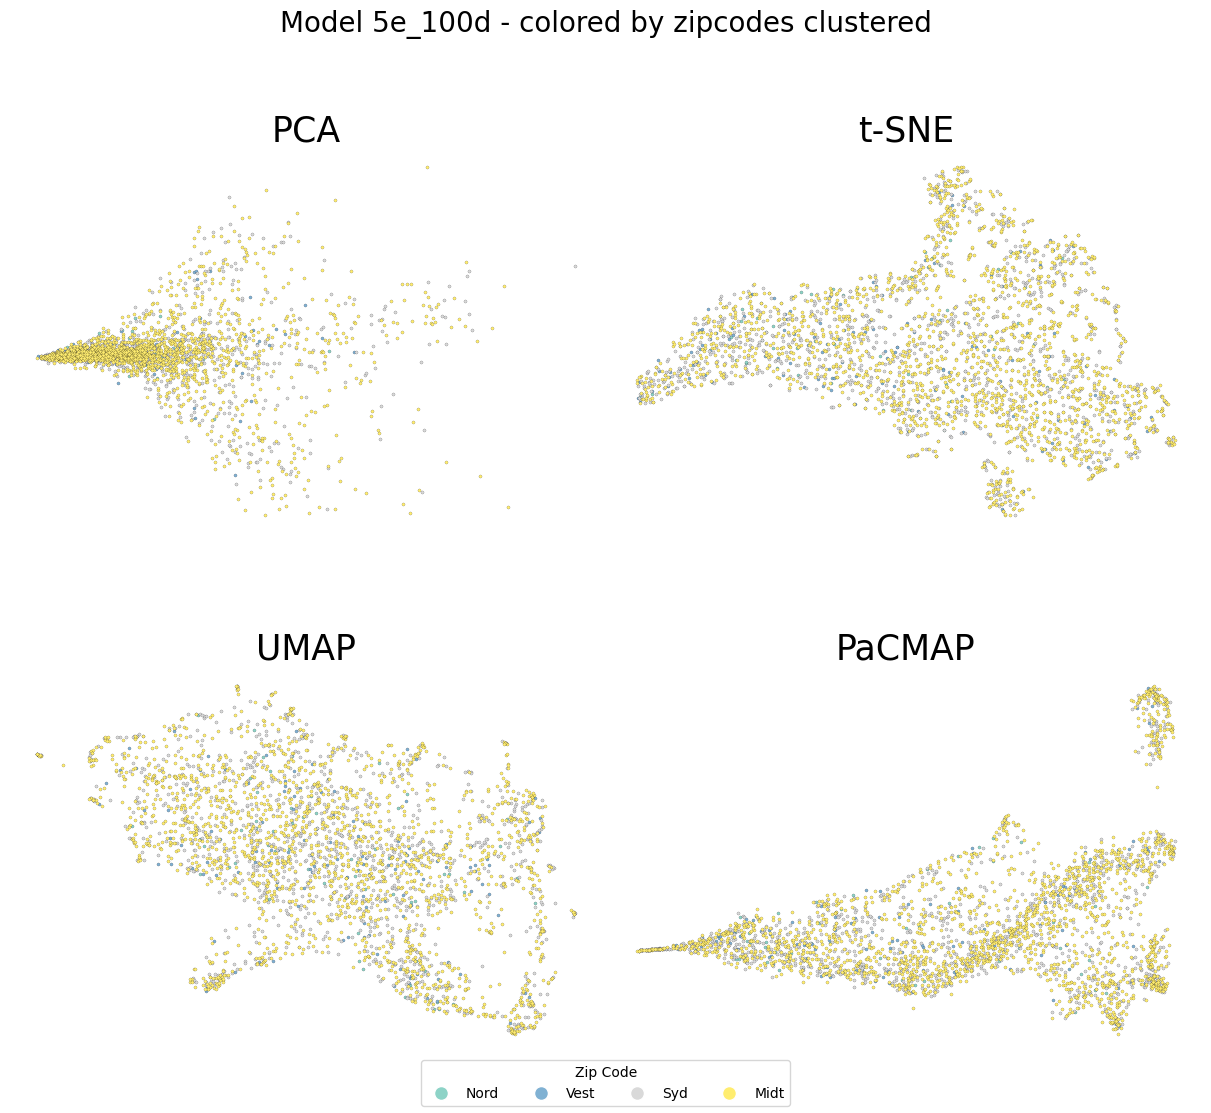

In [88]:

zip_colors = {}  # Dictionary to map zip codes to colors
unique_zip_codes = sorted(zip_to_label_clustered.keys(), reverse=True)
num_colors = len(unique_zip_codes) #change this
color_palette = plt.cm.get_cmap('Set3', num_colors)  # Choose a colormap

for idx, zip_code in enumerate(unique_zip_codes):
    zip_colors[zip_code] = color_palette(idx)

fig, ax = plt.subplots(2, 2, figsize=(12, 10), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_pca, proj_tsne, proj_umap, proj_pacmap]  # Use xs to select different dimensionality reduction results
ts = ["PCA", "t-SNE", "UMAP", "PaCMAP"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=25)
        for current_zip_code in unique_zip_codes:
            # Plot all journeys for each zip code
            relevant_addresses = []
            for address, zip_code in modified_address_cluster_zips.items():
                if address in journey_ids:
                    if current_zip_code == zip_code:
                        relevant_addresses.append(address)
            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_zip_code, edgecolors='black',  c=zip_colors[current_zip_code]
            )

        s += 1
        col.axis('off')

# Custom legend

handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=zip_colors[zip_code], label=zip_to_label_clustered[zip_code]) for zip_code in unique_zip_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Zip Code')
fig.suptitle('Model 5e_100d - colored by zipcodes clustered', fontsize=20, y=1.1)
plt.show()


In [89]:
Counter(modified_address_cluster_zips.values())

Counter({'1000': 2279, '2300': 1379, '2600': 312, '2800': 153})

_____________________________________________________________________

# SIMILARITY - EMBEDDING VALIDATION

In [90]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Assuming X is your embeddings_matrix
embeddings_matrix = X.shape

# Calculate cosine similarity matrix between station vectors
similarity_matrix = cosine_similarity(X)

highest = -1
for i in range(similarity_matrix.shape[0]):
    for j in range(similarity_matrix.shape[1]):
        if i != j and similarity_matrix[i, j] > highest:
            highest = similarity_matrix[i, j]

print(highest)

# Find the indices of the maximum similarity score in the updated matrix
max_indices = np.argwhere(similarity_matrix == highest)

# Extract the indices of the most similar pair
most_similar_pair_indices = max_indices[0]

# Get the station names corresponding to the indices
station_names = model.wv.index_to_key
station_i_name = station_names[most_similar_pair_indices[0]]
station_j_name = station_names[most_similar_pair_indices[1]]

# Print the names of the two most similar stations
print(f"The two most similar stations (not the same) are: {station_i_name} and {station_j_name}")

# # X is your numpy array containing the embedding vectors. Each row of X represents a vector in the embedding space.
# # cosine_similarity(X) computes the cosine similarity between all pairs of vectors in X.
# # The resulting similarity_matrix is a symmetric matrix where each element similarity_matrix[i, j] represents the cosine similarity between vectors X[i] and X[j].
# # After calculating the cosine similarity matrix, you can proceed to perform clustering or any other analysis based on the similarity values.

0.9925275
The two most similar stations (not the same) are: Rødovre and Avedøre


### København H validation on cosine embedding

In [91]:
list_lbh_sim = model.wv.similar_by_key('København H', topn=4000)

kbh_to_sim = {"København H": 1.0}
for location, sim in list_lbh_sim:
    kbh_to_sim[location] = sim

kbh_to_sim

{'København H': 1.0,
 'Axeltorv': 0.7419756054878235,
 'Banegårdspladsen': 0.723770022392273,
 'Vestergade': 0.7030773758888245,
 'Tietgensgade': 0.6947877407073975,
 'Bernstorffsgade': 0.6917286515235901,
 'Vester Voldgade': 0.6807435750961304,
 'DGI Byen': 0.6654631495475769,
 'Hammerichsgade': 0.6576656103134155,
 'Halmtorvet': 0.6545606255531311,
 'Istedgade': 0.6433010101318359,
 'Vodroffs Tværgade': 0.638113260269165,
 'Trommesalen': 0.6324120163917542,
 'København H (Metro)': 0.630353569984436,
 'Rådhusstræde': 0.6302005648612976,
 'Niels Ebbesens Vej': 0.6285241842269897,
 'Reventlowsgade': 0.6279860138893127,
 'Nygade': 0.6167711615562439,
 'Østergade': 0.61446213722229,
 'Knabrostræde': 0.6068124175071716,
 'Frederiksberggade': 0.6029341816902161,
 'Studiestræde': 0.6025193333625793,
 'Carsten Niebuhrs Gade': 0.6013265252113342,
 'Ingerslevsgade': 0.6006447672843933,
 'Gammeltorv': 0.5985398888587952,
 'Krystalgade': 0.5955958366394043,
 'Skelbækgade': 0.5951048731803894,
 'S

low Masteskursvej    -0.08057750016450882
high København H    1.0


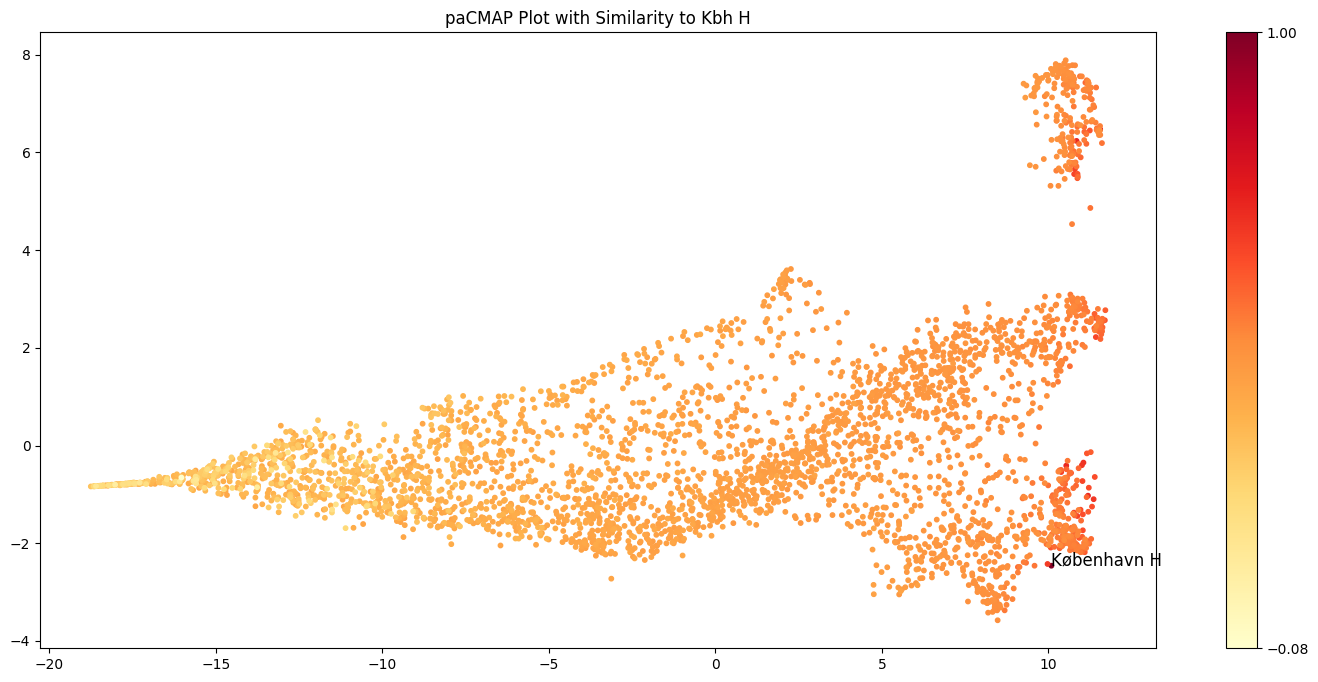

In [92]:

station_names = kbh_to_sim.keys()
# Get the first element
low_key, low_value = list(kbh_to_sim.items())[-1]
high_key, high_value = next(iter(kbh_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(kbh_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

kbh_idx = journey_idx['København H']
#ADD LABEL TO JUST KØBENHAVN H
plt.text(proj_pacmap[kbh_idx, 0], proj_pacmap[kbh_idx, 1], 'København H', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Kbh H')
plt.show()


### Rued Langgaards Vej validation on cosine embedding

In [93]:
list_rued_sim = model.wv.similar_by_key('Rued Langgaards Vej', topn=4000)

rued_to_sim = {"Rued Langgaards Vej": 1.0}
for location, sim in list_rued_sim:
    rued_to_sim[location] = sim

rued_to_sim

{'Rued Langgaards Vej': 1.0,
 'Gunløgsgade': 0.9463154673576355,
 'Krokodillegade': 0.9371039271354675,
 'Vestergårdsvej': 0.9276619553565979,
 'Holmestien': 0.9273006319999695,
 'Mosesvinget': 0.9177141189575195,
 'Vennemindevej': 0.9156631827354431,
 'Dæmningen': 0.9144630432128906,
 'Dyssegårdsvej': 0.9139351844787598,
 'Druehaven': 0.9120191335678101,
 'Osvald Helmuths Vej': 0.9099795818328857,
 'Adolph Steens Alle': 0.9083431363105774,
 'Leo Mathisens Vej': 0.9064526557922363,
 'Islev Torv': 0.9063812494277954,
 'Plantevej': 0.9044299125671387,
 'Bellahøjhallen': 0.9029104113578796,
 'Bjernedevej': 0.902716875076294,
 'Ramsingsvej': 0.9024026393890381,
 'Bjørneklovej': 0.9008928537368774,
 'Smørumvej': 0.9007860422134399,
 'Charlotte Muncks Vej': 0.9000139832496643,
 'Nyborggade': 0.8996153473854065,
 'Teglstrupvej': 0.899306058883667,
 'Præstelængen': 0.8991729617118835,
 'Radisevej': 0.8985075950622559,
 'Jordbærvej': 0.8984037041664124,
 'Dirch Passers Allé': 0.8981117010116577

low Rued Langgaards Vej    1.0
high Masteskursvej    0.010991927236318588


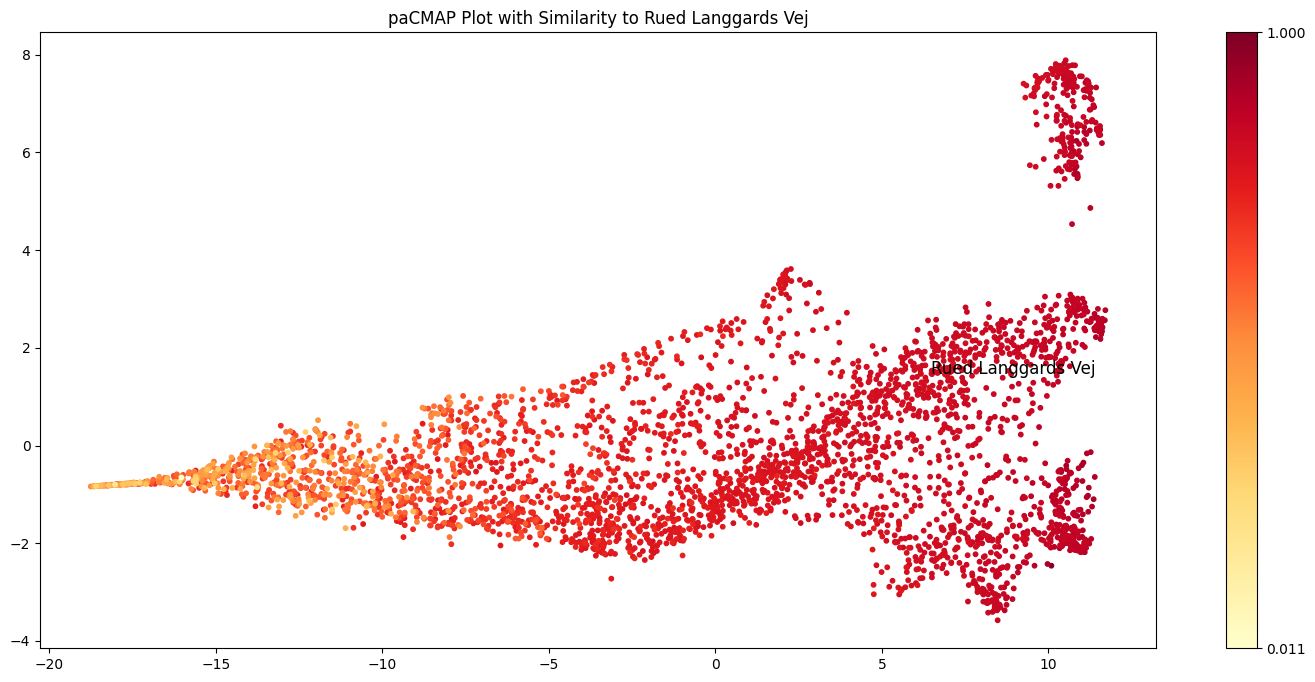

In [94]:

station_names = rued_to_sim.keys()
# Get the first element
low_key, low_value = next(iter(rued_to_sim.items()))
high_key, high_value = list(rued_to_sim.items())[-1]

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(rued_to_sim[station]) for station in station_names]
# Plot the stations using paCMAP with grayscale colors
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale


rued_idx = journey_idx['Rued Langgaards Vej']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[rued_idx, 0], proj_pacmap[rued_idx, 1], 'Rued Langgards Vej', fontsize=12, ha='left')

plt.title('paCMAP Plot with Similarity to Rued Langgards Vej')
plt.show()


### Æblehaven validation on cosine embedding

In [95]:
list_æble_sim = model.wv.similar_by_key('Æblehaven', topn=4000)

æble_to_sim = {"Æblehaven": 1.0}
for location, sim in list_æble_sim:
    æble_to_sim[location] = sim

æble_to_sim

{'Æblehaven': 1.0,
 'Krogerupgade': 0.9694114923477173,
 'Allersgade': 0.9649638533592224,
 'Nordborggade': 0.9648228883743286,
 'Lykkesholms Allé': 0.9640272259712219,
 'Bisiddervej': 0.9625719785690308,
 'Damstien': 0.9623842239379883,
 'Esbern Snares Gade': 0.9618849754333496,
 'Urbansgade': 0.9610703587532043,
 'Gavlhusvej': 0.9607893228530884,
 'Solrødvej': 0.9601006507873535,
 'Hothers Plads': 0.959409773349762,
 'Hørdumsgade': 0.9590247273445129,
 'Parkstykket': 0.9584876894950867,
 'Hvidovre Torv': 0.9583888649940491,
 'Krabbesholmvej': 0.9582467079162598,
 'Borgskrivervej': 0.9581977128982544,
 'Sokkelundsvej': 0.9579871296882629,
 'Mylius Erichsens Allé': 0.9579141736030579,
 'Valdemar Holmers Gade': 0.9566963315010071,
 'Klintevej': 0.9566445350646973,
 'Fjenneslevvej': 0.9563651084899902,
 'Landfogedvej': 0.9563608765602112,
 'Nørrebrogade midlertidigt': 0.95609050989151,
 'Victor Bendix Gade': 0.9560875296592712,
 'Stubbevangen': 0.9560455083847046,
 'Normasvej': 0.9558838

low Masteskursvej    0.038444582372903824
high Æblehaven    1.0


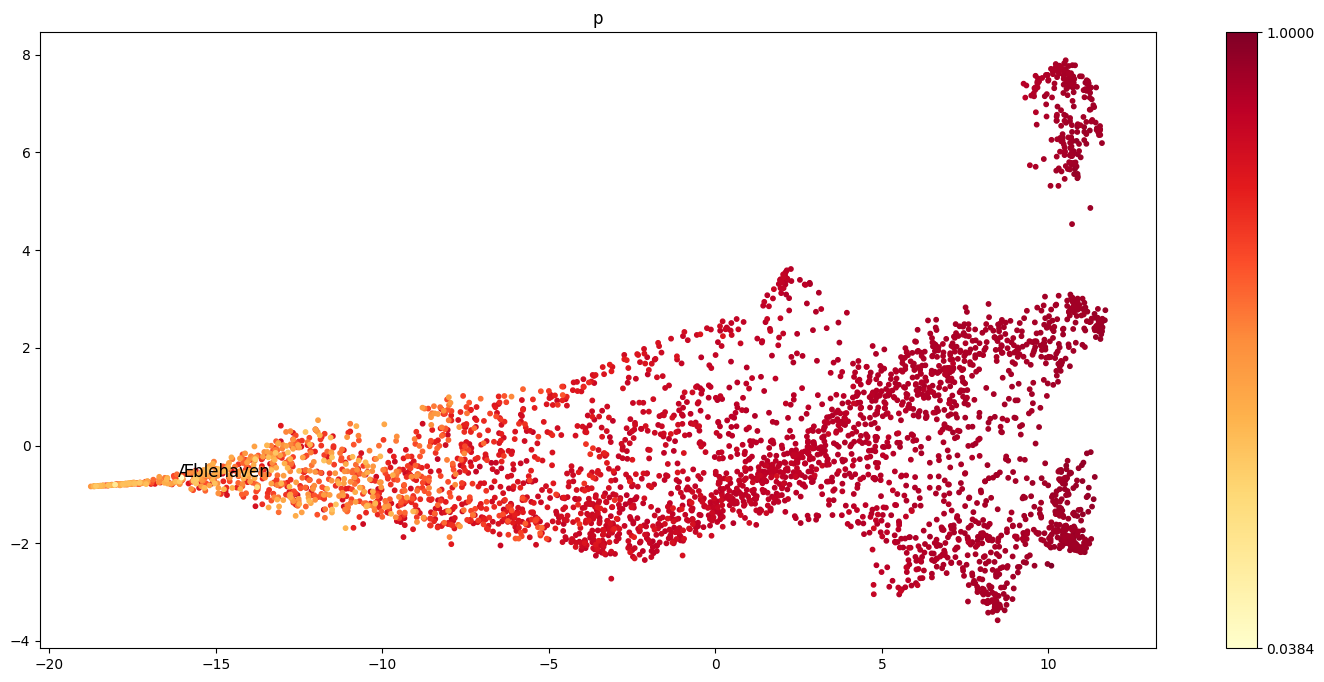

In [96]:

station_names = æble_to_sim.keys()
# Get the first element
low_key, low_value = list(æble_to_sim.items())[-1]
high_key, high_value = next(iter(æble_to_sim.items()))

print("low", low_key, "  ", low_value)
print("high", high_key, "  ", high_value)
norm = Normalize(vmin=low_value, vmax=high_value)
fig, ax = plt.subplots(1, 1, figsize=(18, 8))

grayscale_values = [(æble_to_sim[station]) for station in station_names]
scatter = plt.scatter(proj_pacmap[:, 0], proj_pacmap[:, 1], c=grayscale_values, cmap='YlOrRd', s=10, alpha=1.0)

# Set the colorbar
colorbar = plt.colorbar(scatter, ax=ax)

# Manually set colorbar ticks and labels
colorbar.set_ticks([high_value, low_value])  # Adjust these as needed based on your scale

æble_idx = journey_idx['Æblehaven']
#ADD LABEL TO JUST RUED LANGGAARDS VEJ
plt.text(proj_pacmap[æble_idx, 0], proj_pacmap[æble_idx, 1], 'Æblehaven', fontsize=12, ha='left')

plt.title('p')
plt.show()


__________________________________________________________________________________________________________________________________________________________

# CHOOSING MODEL AND DIMENSIONS


In [97]:
model_10000_100=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d.model')
model_10000_100_lowest=word2vec.Word2Vec.load('../Data/Models/model_10000e_100d_lowest_loss.model')
model_2000_300=word2vec.Word2Vec.load('../Data/Models/best_model_new.model') 
model_2000_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_2000e.model')
model_50_300=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_300d.model')
model_50_100=word2vec.Word2Vec.load('../Data/Models/model_5325_locations_50e_100d.model')
model_10_100= word2vec.Word2Vec.load('../Data/Models/model_10e_100d.model')
model_5_100= word2vec.Word2Vec.load('../Data/Models/model_5e_100d.model')
model_2_100= word2vec.Word2Vec.load('../Data/Models/model_2e_100d.model')
model_1_100= word2vec.Word2Vec.load('../Data/Models/model_1e_100d.model')

Plotting all models with paCMAP

In [98]:
X = model_10000_100.wv.vectors
embedding_10000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100 = embedding_10000_100.fit_transform(X, init="pca")

X1 = model_10000_100_lowest.wv.vectors
embedding_10000_100_lowest = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10000_100_lowest = embedding_10000_100_lowest.fit_transform(X1, init="pca")

X2 = model_2000_300.wv.vectors
embedding_2000_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_300 = embedding_2000_300.fit_transform(X2, init="pca")

X3 = model_2000_100.wv.vectors
embedding_2000_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2000_100 = embedding_2000_100.fit_transform(X3, init="pca")

X4 = model_50_300.wv.vectors
embedding_50_300 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_300 = embedding_50_300.fit_transform(X4, init="pca")

X5 = model_50_100.wv.vectors
embedding_50_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_50_100 = embedding_50_100.fit_transform(X5, init="pca")

X6 = model_10_100.wv.vectors
embedding_10_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_10_100 = embedding_10_100.fit_transform(X6, init="pca")

X7 = model_5_100.wv.vectors
embedding_5_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_5_100 = embedding_5_100.fit_transform(X7, init="pca")

X8 = model_2_100.wv.vectors
embedding_2_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_2_100 = embedding_2_100.fit_transform(X8, init="pca")

X9 = model_1_100.wv.vectors
embedding_1_100 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_1_100 = embedding_1_100.fit_transform(X9, init="pca")


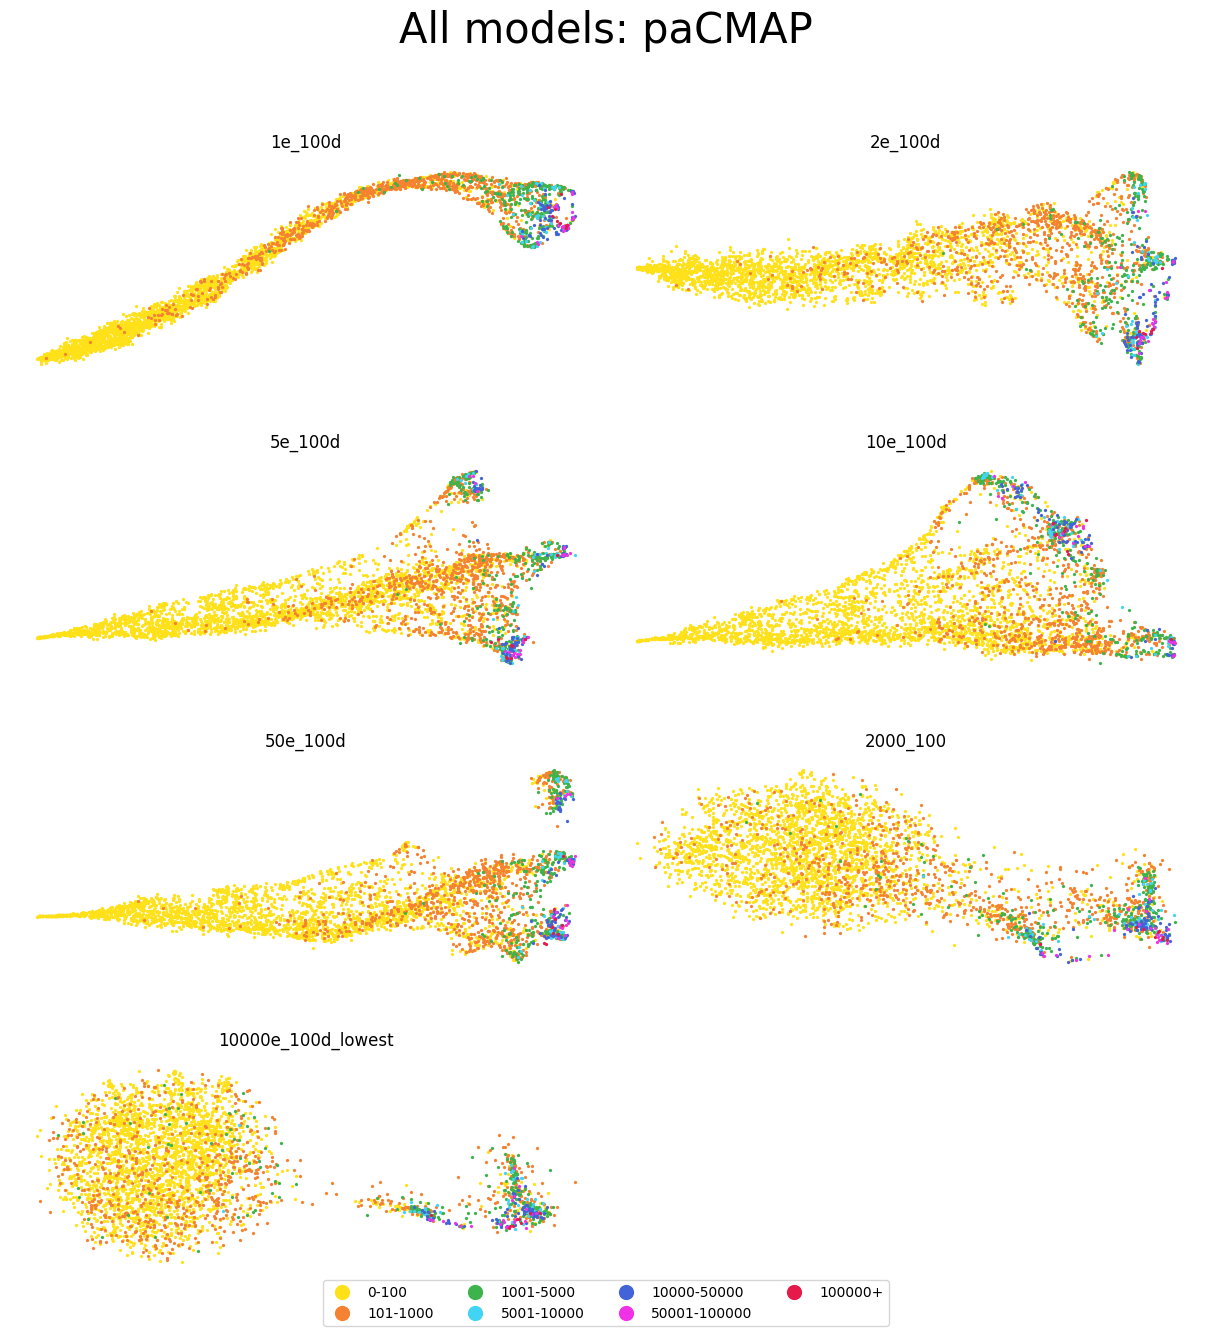

In [99]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_pacmap, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            for current_count_code in unique_count_codes:
                relevant_addresses = []
                for address, count_code in address_cluster_count.items():
                    if address in journey_ids:
                        if current_count_code == count_code:
                            relevant_addresses.append(address)

                relevant_journeys_count = [journey_id for journey_id in relevant_addresses]
                col.scatter(
                    [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_count],
                    [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_count],
                    lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
                )
            #  # Add labels to stations makes it impossible to read 
            #     for journey_id in relevant_journeys_zip:
            #         x_coord = xs[s][journey_idx[journey_id]][0]
            #         y_coord = xs[s][journey_idx[journey_id]][1]
            #         col.text(x_coord, y_coord, journey_id, fontsize=8)  # Adjust fontsize as needed
                
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4)
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


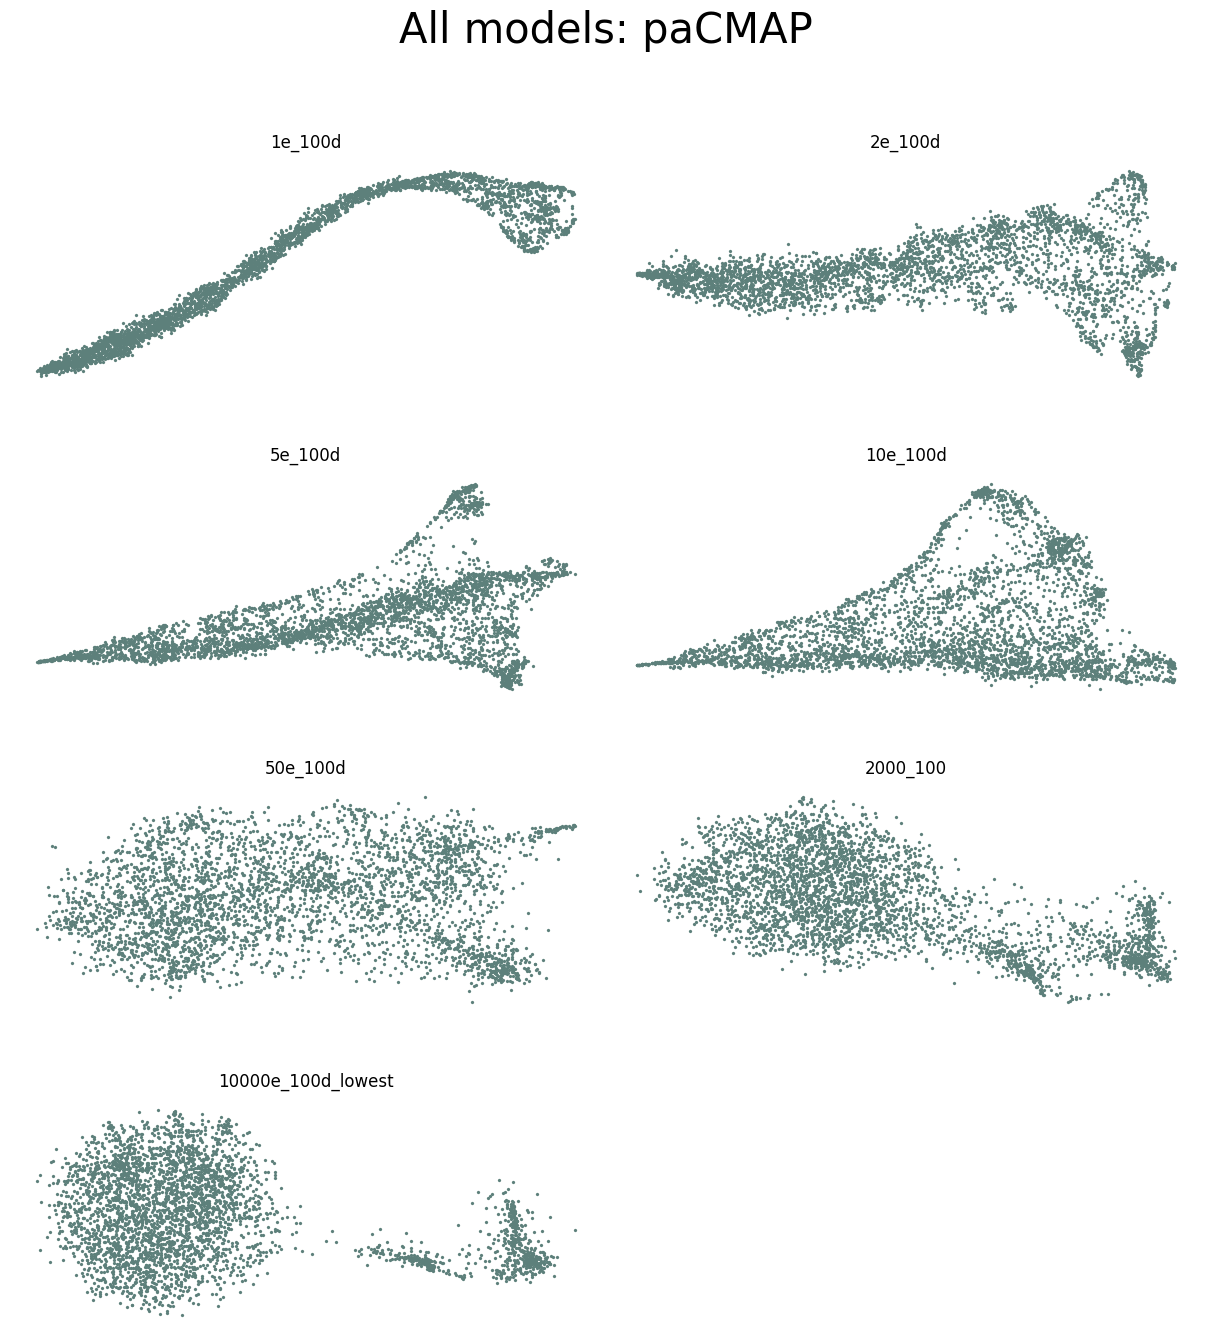

In [100]:
# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
#color_palette = plt.cm.get_cmap('tab20', num_colors)  # Choose a colormap
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#print("number of unique zips: ", num_colors)

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

# Create the plots
fig, ax = plt.subplots(4, 2, figsize=(12, 12), layout='constrained', gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_1_100, proj_2_100, proj_5_100, proj_10_100, proj_50_100, proj_2000_100, proj_10000_100_lowest]  # Use xs to select different dimensionality reduction results
ts = ["1e_100d", "2e_100d", "5e_100d","10e_100d", "50e_100d", "2000_100", "10000e_100d_lowest"]
s = 0
fig.delaxes(ax[3, 1])

for row in ax:
    for col in row:
        try:
            col.set_title(ts[s], fontsize=12, pad=10)
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in journey_ids],
                [xs[s][journey_idx[journey_id]][1] for journey_id in journey_ids],
                lw=0.1, s=5, label=current_count_code, c='#5D807B'
            )
            s += 1
            col.axis('off')
        except IndexError:
            continue


# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=12, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.suptitle('All models: paCMAP', fontsize=30, y=1.1)
plt.show()


# PARAMS NEIGHBORS

In [101]:
X10 = model.wv.vectors
embedding_x10 = pacmap.PaCMAP(n_components=2, n_neighbors=5, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_5 = embedding_x10.fit_transform(X10, init="pca")

X11 = model.wv.vectors
embedding_x11 = pacmap.PaCMAP(n_components=2, n_neighbors=10, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_10 = embedding_x11.fit_transform(X11, init="pca")

X12 = model.wv.vectors
embedding_x12 = pacmap.PaCMAP(n_components=2, n_neighbors=15, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_15 = embedding_x12.fit_transform(X12, init="pca")

X13 = model.wv.vectors
embedding_x13 = pacmap.PaCMAP(n_components=2, n_neighbors=20, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_20 = embedding_x13.fit_transform(X13, init="pca")

X14 = model.wv.vectors
embedding_x14 = pacmap.PaCMAP(n_components=2, n_neighbors=30, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_30 = embedding_x14.fit_transform(X14, init="pca")

X15 = model.wv.vectors
embedding_x15 = pacmap.PaCMAP(n_components=2, n_neighbors=40, MN_ratio=0.5, FP_ratio=2.0) 
proj_n_40 = embedding_x15.fit_transform(X15, init="pca")


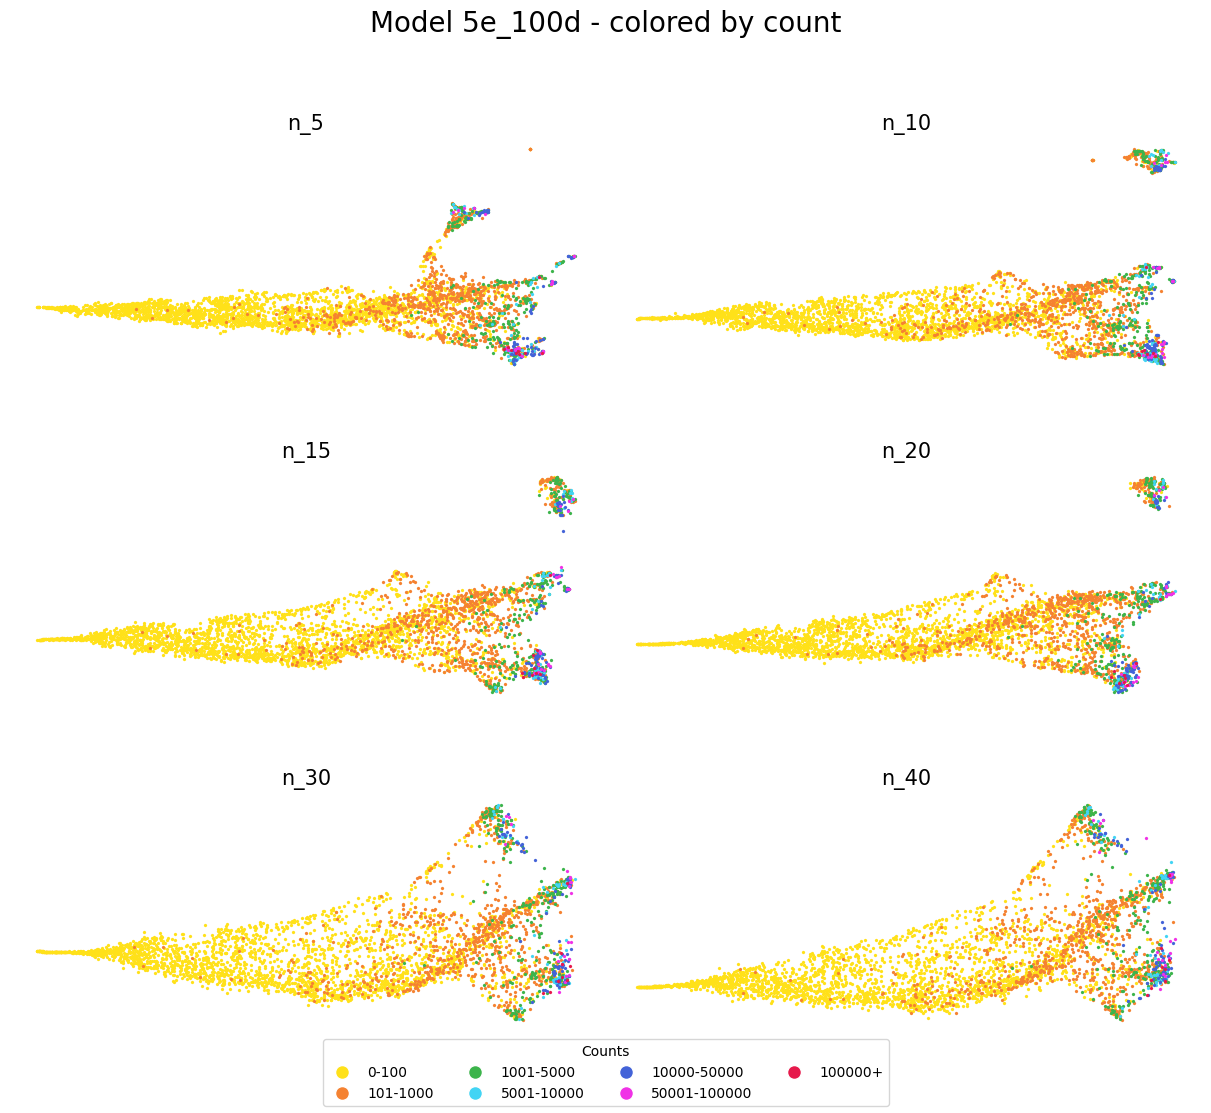

In [102]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(3, 2, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})
xs = [proj_n_5, proj_n_10, proj_n_15, proj_n_20, proj_n_30, proj_n_40]  # Use xs to select different dimensionality reduction results
ts = ["n_5", "n_10", "n_15", "n_20", "n_30", "n_40"]
s = 0

for row in ax:
    for col in row:
        col.set_title(ts[s], fontsize=15)

        for current_count_code in unique_count_codes:
            relevant_addresses = []
            for address, count_code in address_cluster_count.items():
                if address in journey_ids:
                    if current_count_code == count_code:
                        relevant_addresses.append(address)

            relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
            col.scatter(
                [xs[s][journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
                [xs[s][journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
                lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
            )  
        s += 1
        col.axis('off')

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


# WHAT ARE THE 3 CHICKENTOES?

In [103]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express
#fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True}, text=station_names)
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', hover_data={'Station Name': True})

# Customize the size and color of the points
fig.update_traces(marker=dict(size=5,  # Adjust the size of the points as needed
                               color='#5D807B',  # Change the color of the points
                               opacity=1.0),  # Adjust the opacity of the points
                  selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)

)




# Show the plot
fig.show()


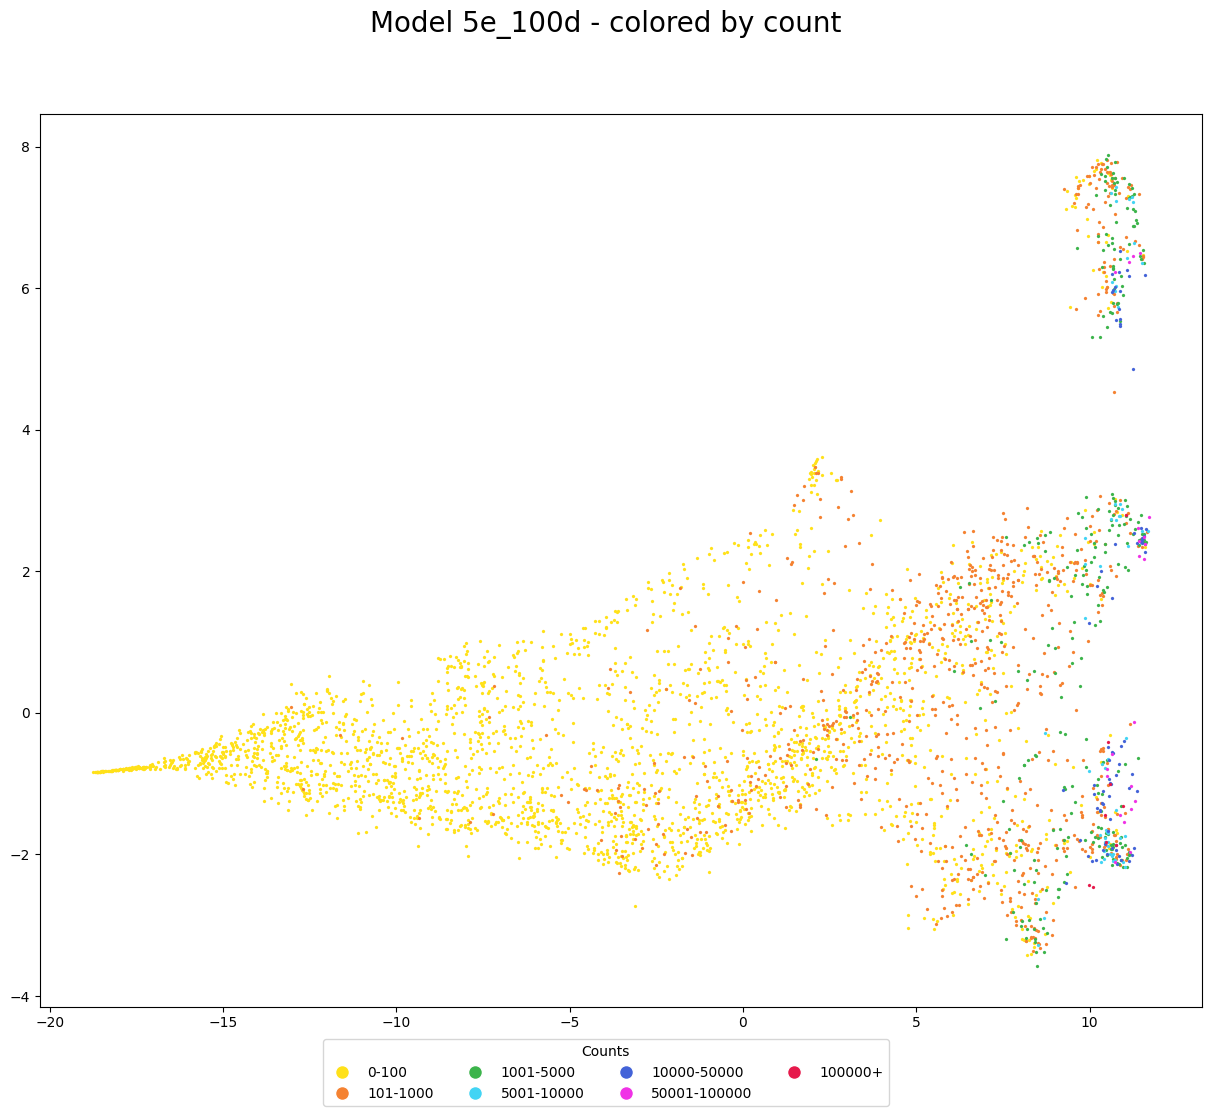

In [104]:

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
num_colors = len(unique_count_codes) #change this
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]

fig, ax = plt.subplots(1, 1, figsize=(12, 10), layout="constrained", gridspec_kw={'wspace': 0.0, 'hspace': 0.2})


for current_count_code in unique_count_codes:
    relevant_addresses = []
    for address, count_code in address_cluster_count.items():
        if address in journey_ids:
            if current_count_code == count_code:
                relevant_addresses.append(address)

    relevant_journeys_zip = [journey_id for journey_id in relevant_addresses]
    plt.scatter(
        [proj_pacmap[journey_idx[journey_id]][0] for journey_id in relevant_journeys_zip],
        [proj_pacmap[journey_idx[journey_id]][1] for journey_id in relevant_journeys_zip],
        lw=0.1, s=5, label=current_count_code, c=count_colors[current_count_code]
    )

# Custom legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=count_colors[count_code], label=counts_to_labels[count_code]) for count_code in unique_count_codes]
fig.legend(handles= handles, loc="outside lower center", ncol=4, title='Counts')
fig.suptitle('Model 5e_100d - colored by count', fontsize=20, y=1.1)
plt.show()


In [105]:
import plotly.express as px
import pandas as pd

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Create the scatter plot using Plotly Express and color by count
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Station Name', 
                 hover_data={'Station Name': True},
                 color_discrete_map=count_colors)  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    xaxis_title="Dimension 1",
    yaxis_title="Dimension 2",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()


In [106]:
import plotly.graph_objects as go
import plotly.express as px
import pandas as pd

# Define color palette for zip codes
count_colors = {}  # Dictionary to map zip codes to colors
unique_count_codes = sorted(counts_to_labels.keys())
print(unique_count_codes)
num_colors = len(unique_count_codes)
color_palette = ['#ffe119', '#f58231', '#3cb44b', '#42d4f4', '#4363d8', '#f032e6', '#e6194b']
#color_palette = ['gold', 'tomato', 'limegreen', 'deepskyblue', 'royalblue', 'orchid', 'crimson']

for idx, count_code in enumerate(unique_count_codes):
    count_colors[count_code] = color_palette[idx]  # Use modulo to cycle through the color palette

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Map addresses to counts
address_counts = {address: address_cluster_count[address] for address in journey_ids}
df['Count'] = df['Station Name'].map(address_counts)

# Map counts to colors
df['Color'] = df['Count'].map(count_colors)
# Create traces for each unique color

import plotly.graph_objects as go

# Create traces for each unique color
legend_traces = []
for count_code, color in count_colors.items():
    # Filter DataFrame to include only rows with the current count_code
    filtered_df = df[df['Count'] == count_code]
    # Create a scatter trace for this color
    trace = go.Scatter(
        x=filtered_df['Dimension 1'],
        y=filtered_df['Dimension 2'],
        mode='markers',
        marker=dict(color=color),
        name=str(count_code),  # Use count_code as legend label
        hoverinfo='text',  # Show text on hover
        text=filtered_df['Station Name'] + ' (' + filtered_df['Count'].astype(str) + ')',  # Concatenate station name and count
    )
    legend_traces.append(trace)

# Add the scatter traces to the figure
fig = go.Figure(data=legend_traces)

# Update the layout
fig.update_layout(
    title="PaCMAP Visualization",
    height=800  # Set the height of the plot (in pixels)
)

# Show the plot
fig.show()



[100, 1000, 5000, 10000, 50000, 100000, 100001]


In [107]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

#add colors to all stations based on there similiarity to kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)

# Create the scatter plot using Plotly Express and color by sim
fig = px.scatter(df, x='Dimension 1', y='Dimension 2', color='Sim', 
                 hover_data={'Station Name': True}, color_continuous_scale='YlOrRd')  # Use the color palette

# Customize the size of the points
fig.update_traces(marker=dict(size=5, opacity=1.0), selector=dict(mode='markers'))

# Update the layout if needed
fig.update_layout(
    title="PaCMAP Visualization",
    height=800,  # Set the height of the plot (in pixels)
    coloraxis_colorbar=dict(
        title="Similarity",
        tickvals=[low_value, 0, high_value],  # Custom tick values
        ticktext=[math.trunc(low_value), high_value],  # Custom tick labels
    )
)


# Show the plot
fig.show()


In [108]:
import plotly.express as px
import pandas as pd
import math

# Create a Pandas DataFrame
df = pd.DataFrame(data=proj_pacmap, columns=['Dimension 1', 'Dimension 2'])
df['Station Name'] = journey_ids

# Count from map address_cluster_count that maps each address to the count intervals
df['Count'] = df['Station Name'].map(address_cluster_count)

# Sim to Kbh from map kbh_to_sim that maps address to its similarity to Kbh
df['Sim'] = df['Station Name'].map(kbh_to_sim)

#
df['Zip'] = df['Station Name'].map(modified_address_cluster_zips)
df


Dimension 1  Dimension 2                Station Name   Count       Sim  \
0       10.089178    -2.460590                 København H  100001  1.000000   
1       11.553703     6.470685                  Borrebyvej     100  0.319617   
2       10.736130    -2.080926              Hulgårds Plads   10000  0.333789   
3       11.188202    -1.027164  Islands Brygge St. (Metro)  100000  0.464858   
4       10.535337    -0.411811         København H (Metro)  100001  0.630354   
...           ...          ...                         ...     ...       ...   
3746   -16.083109    -0.737903               Sydstrandsvej     100  0.464879   
3747   -13.813832    -0.280054                  Pildamsvej     100  0.345662   
3748   -13.758002    -0.854930                   Poppelhøj     100  0.380542   
3749   -18.022358    -0.802257        CBS Handelshøjskolen     100  0.394621   
3750   -16.030685    -0.655301              Grønnegårdsvej     100  0.321517   

       Zip  
0     1000  
1     1000  
2     1000  
3     1000  
4     1000  
...    ...  
3746  2300  
3747  2600  
3748   NaN  
3749   NaN  
3750   NaN  

[3751 rows x 6 columns]

#### top toe

In [109]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 9.59) & 
                 (df['Dimension 2'] >= 4.7) & (df['Dimension 2'] <= 7.8)]
filtered_df

Dimension 1  Dimension 2   Station Name  Count       Sim   Zip
1027     9.569121     7.147717       Kochsvej    100  0.472530  2600
1042     9.484951     7.163849     Fåborggade    100  0.385600  1000
1102     9.443311     5.737145      Vardegade    100  0.432072  1000
1142     9.580247     7.314180     Wilkensvej    100  0.458980  1000
1190     9.557595     7.207107      Ålholmvej   1000  0.399610  2300
1205     9.338465     7.369640    Boldhusgade    100  0.452029  1000
1468     9.254221     7.406751  Langeliniekaj   1000  0.436200  1000
1631     9.305616     7.121489       Dalføret    100  0.392952  2300

In [110]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2   Station Name  Count       Sim   Zip
1190     9.557595     7.207107      Ålholmvej   1000  0.399610  2300
1468     9.254221     7.406751  Langeliniekaj   1000  0.436200  1000
1027     9.569121     7.147717       Kochsvej    100  0.472530  2600
1042     9.484951     7.163849     Fåborggade    100  0.385600  1000
1102     9.443311     5.737145      Vardegade    100  0.432072  1000
1142     9.580247     7.314180     Wilkensvej    100  0.458980  1000
1205     9.338465     7.369640    Boldhusgade    100  0.452029  1000
1631     9.305616     7.121489       Dalføret    100  0.392952  2300

In [111]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2   Station Name  Count       Sim   Zip
1027     9.569121     7.147717       Kochsvej    100  0.472530  2600
1142     9.580247     7.314180     Wilkensvej    100  0.458980  1000
1205     9.338465     7.369640    Boldhusgade    100  0.452029  1000
1468     9.254221     7.406751  Langeliniekaj   1000  0.436200  1000
1102     9.443311     5.737145      Vardegade    100  0.432072  1000
1190     9.557595     7.207107      Ålholmvej   1000  0.399610  2300
1631     9.305616     7.121489       Dalføret    100  0.392952  2300
1042     9.484951     7.163849     Fåborggade    100  0.385600  1000

#### Middle toe

In [112]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 10.0) & (df['Dimension 1'] <= 12.31) & 
                 (df['Dimension 2'] >= 1.0) & (df['Dimension 2'] <= 2.19)]
filtered_df

Dimension 1  Dimension 2                Station Name   Count       Sim  \
51     11.561965     2.180279  Lergravsparken St. (Metro)  100000  0.373707   
96     10.645232     1.622750         Kastrup St. (Metro)   50000  0.260457   
207    11.021003     2.061163             Hollændervænget    5000  0.423060   
208    10.288252     1.305037        Frederiksberg Rådhus    5000  0.271046   
212    10.313215     2.079681            Korsvejens Skole   10000  0.239026   
233    10.387013     1.658466          Prins Jørgens Gård    1000  0.558198   
238    10.514762     1.779386                Rundholtsvej    5000  0.292571   
272    10.380980     1.732227          Universitetsparken    5000  0.386715   
300    11.094427     2.016129             Jyllingevej St.    5000  0.329512   
306    10.278717     1.926868                    Søtorvet    5000  0.410912   
312    10.238222     1.527970            Sønder Boulevard    5000  0.363942   
319    10.337339     2.007971             Svanemøllen St.   50000  0.379306   
323    10.822340     2.103652                Damhustorvet    5000  0.329724   
324    10.297461     1.671096                   Arkaderne    1000  0.348802   
328    10.368449     1.527029         Karen Blixens Plads    1000  0.368333   
332    10.201065     1.789758         Otto Mønsteds Plads   50000  0.451220   
364    10.410724     1.706304    H.C. Andersens Boulevard    5000  0.506619   
372    10.144860     1.241492                     Digevej    5000  0.312441   
377    10.338820     1.613428           A.H. Vedels Plads     100  0.360478   
379    10.603100     2.070957            Sjælør Boulevard    1000  0.186078   
384    10.344917     1.693531               Kirkegårdsvej    1000  0.427912   
388    10.751552     1.936255               Krudttårnsvej    1000  0.354782   
423    10.044331     2.132125              Valby/Nørrebro    5000  0.183089   
439    10.252044     1.430041            Ben Websters Vej    1000  0.430333   
443    10.233726     1.877324           Ndr. Frihavnsgade    1000  0.498945   
458    10.615435     2.015229                  Melstedvej    1000  0.218658   
500    10.071365     1.811005                 Wildersgade    1000  0.409106   
548    10.007369     1.816528                Estlandsgade     100  0.386698   
554    10.011729     1.803245              Landsdommervej    1000  0.470533   

      Zip  
51   1000  
96   2300  
207  2300  
208   NaN  
212  2300  
233  1000  
238  2300  
272  1000  
300  1000  
306  1000  
312  1000  
319  1000  
323  2600  
324  1000  
328  2300  
332  1000  
364  1000  
372  2800  
377  1000  
379  1000  
384  2300  
388  2300  
423   NaN  
439  1000  
443  1000  
458  2300  
500  1000  
548  1000  
554  1000

In [113]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count

Dimension 1  Dimension 2                Station Name   Count       Sim  \
51     11.561965     2.180279  Lergravsparken St. (Metro)  100000  0.373707   
332    10.201065     1.789758         Otto Mønsteds Plads   50000  0.451220   
96     10.645232     1.622750         Kastrup St. (Metro)   50000  0.260457   
319    10.337339     2.007971             Svanemøllen St.   50000  0.379306   
212    10.313215     2.079681            Korsvejens Skole   10000  0.239026   
306    10.278717     1.926868                    Søtorvet    5000  0.410912   
372    10.144860     1.241492                     Digevej    5000  0.312441   
364    10.410724     1.706304    H.C. Andersens Boulevard    5000  0.506619   
323    10.822340     2.103652                Damhustorvet    5000  0.329724   
312    10.238222     1.527970            Sønder Boulevard    5000  0.363942   
300    11.094427     2.016129             Jyllingevej St.    5000  0.329512   
272    10.380980     1.732227          Universitetsparken    5000  0.386715   
238    10.514762     1.779386                Rundholtsvej    5000  0.292571   
208    10.288252     1.305037        Frederiksberg Rådhus    5000  0.271046   
207    11.021003     2.061163             Hollændervænget    5000  0.423060   
423    10.044331     2.132125              Valby/Nørrebro    5000  0.183089   
388    10.751552     1.936255               Krudttårnsvej    1000  0.354782   
458    10.615435     2.015229                  Melstedvej    1000  0.218658   
500    10.071365     1.811005                 Wildersgade    1000  0.409106   
443    10.233726     1.877324           Ndr. Frihavnsgade    1000  0.498945   
439    10.252044     1.430041            Ben Websters Vej    1000  0.430333   
328    10.368449     1.527029         Karen Blixens Plads    1000  0.368333   
384    10.344917     1.693531               Kirkegårdsvej    1000  0.427912   
379    10.603100     2.070957            Sjælør Boulevard    1000  0.186078   
324    10.297461     1.671096                   Arkaderne    1000  0.348802   
233    10.387013     1.658466          Prins Jørgens Gård    1000  0.558198   
554    10.011729     1.803245              Landsdommervej    1000  0.470533   
377    10.338820     1.613428           A.H. Vedels Plads     100  0.360478   
548    10.007369     1.816528                Estlandsgade     100  0.386698   

      Zip  
51   1000  
332  1000  
96   2300  
319  1000  
212  2300  
306  1000  
372  2800  
364  1000  
323  2600  
312  1000  
300  1000  
272  1000  
238  2300  
208   NaN  
207  2300  
423   NaN  
388  2300  
458  2300  
500  1000  
443  1000  
439  1000  
328  2300  
384  2300  
379  1000  
324  1000  
233  1000  
554  1000  
377  1000  
548  1000

In [114]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2                Station Name   Count       Sim  \
233    10.387013     1.658466          Prins Jørgens Gård    1000  0.558198   
364    10.410724     1.706304    H.C. Andersens Boulevard    5000  0.506619   
443    10.233726     1.877324           Ndr. Frihavnsgade    1000  0.498945   
554    10.011729     1.803245              Landsdommervej    1000  0.470533   
332    10.201065     1.789758         Otto Mønsteds Plads   50000  0.451220   
439    10.252044     1.430041            Ben Websters Vej    1000  0.430333   
384    10.344917     1.693531               Kirkegårdsvej    1000  0.427912   
207    11.021003     2.061163             Hollændervænget    5000  0.423060   
306    10.278717     1.926868                    Søtorvet    5000  0.410912   
500    10.071365     1.811005                 Wildersgade    1000  0.409106   
272    10.380980     1.732227          Universitetsparken    5000  0.386715   
548    10.007369     1.816528                Estlandsgade     100  0.386698   
319    10.337339     2.007971             Svanemøllen St.   50000  0.379306   
51     11.561965     2.180279  Lergravsparken St. (Metro)  100000  0.373707   
328    10.368449     1.527029         Karen Blixens Plads    1000  0.368333   
312    10.238222     1.527970            Sønder Boulevard    5000  0.363942   
377    10.338820     1.613428           A.H. Vedels Plads     100  0.360478   
388    10.751552     1.936255               Krudttårnsvej    1000  0.354782   
324    10.297461     1.671096                   Arkaderne    1000  0.348802   
323    10.822340     2.103652                Damhustorvet    5000  0.329724   
300    11.094427     2.016129             Jyllingevej St.    5000  0.329512   
372    10.144860     1.241492                     Digevej    5000  0.312441   
238    10.514762     1.779386                Rundholtsvej    5000  0.292571   
208    10.288252     1.305037        Frederiksberg Rådhus    5000  0.271046   
96     10.645232     1.622750         Kastrup St. (Metro)   50000  0.260457   
212    10.313215     2.079681            Korsvejens Skole   10000  0.239026   
458    10.615435     2.015229                  Melstedvej    1000  0.218658   
379    10.603100     2.070957            Sjælør Boulevard    1000  0.186078   
423    10.044331     2.132125              Valby/Nørrebro    5000  0.183089   

      Zip  
233  1000  
364  1000  
443  1000  
554  1000  
332  1000  
439  1000  
384  2300  
207  2300  
306  1000  
500  1000  
272  1000  
548  1000  
319  1000  
51   1000  
328  2300  
312  1000  
377  1000  
388  2300  
324  1000  
323  2600  
300  1000  
372  2800  
238  2300  
208   NaN  
96   2300  
212  2300  
458  2300  
379  1000  
423   NaN

#### Bottom Toe

In [115]:
# Filter the DataFrame based on the conditions
filtered_df = df[(df['Dimension 1'] >= 6.0) & (df['Dimension 1'] <= 10.85) & 
                 (df['Dimension 2'] >= -4.53) & (df['Dimension 2'] <= -1.558)]
filtered_df

Dimension 1  Dimension 2      Station Name   Count       Sim   Zip
0       10.089178    -2.460590       København H  100001  1.000000  1000
2       10.736130    -2.080926    Hulgårds Plads   10000  0.333789  1000
6       10.761607    -1.873052     Nørreport St.  100001  0.476843  1000
10       9.974063    -2.425117      CPH Lufthavn  100001  0.211133  2300
26      10.633979    -1.910232       Fisketorvet   50000  0.466926  1000
...           ...          ...               ...     ...       ...   ...
1564     7.598233    -1.976627         Skibbroen     100  0.431136  1000
1617     6.098635    -2.061206  Lykkesholms Allé     100  0.416201   NaN
1669     6.164271    -2.349674      Agerlandsvej     100  0.346701  2300
1741     6.036895    -2.538196    Kildebakke St.     100  0.416831   NaN
2036     6.069965    -2.859708  Kildegårds Plads     100  0.467059  2800

[308 rows x 6 columns]

In [116]:
sorted_by_count = filtered_df.sort_values(by='Count', ascending=False)
sorted_by_count     

Dimension 1  Dimension 2                Station Name   Count       Sim  \
0       10.089178    -2.460590                 København H  100001  1.000000   
6       10.761607    -1.873052               Nørreport St.  100001  0.476843   
10       9.974063    -2.425117                CPH Lufthavn  100001  0.211133   
61      10.464615    -1.819661  Christianshavn St. (Metro)  100001  0.444462   
31      10.746896    -2.107833   Rådhuspladsen St. (Metro)  100000  0.506567   
...           ...          ...                         ...     ...       ...   
580      7.873957    -1.950588                Istanbulgade     100  0.350789   
885      6.808453    -2.512451               Mjølnerparken     100  0.379497   
585      8.323700    -3.406503         Scandic Sluseholmen     100  0.320331   
586      8.391135    -3.253704                 Klovborgvej     100  0.279954   
2036     6.069965    -2.859708            Kildegårds Plads     100  0.467059   

       Zip  
0     1000  
6     1000  
10    2300  
61    1000  
31    1000  
...    ...  
580   1000  
885   1000  
585   1000  
586   2600  
2036  2800  

[308 rows x 6 columns]

In [117]:
sorted_by_sim = sorted_by_count.sort_values(by='Sim', ascending=False)
sorted_by_sim

Dimension 1  Dimension 2              Station Name   Count       Sim  \
0       10.089178    -2.460590               København H  100001  1.000000   
797      8.033492    -1.792289              Tietgensgade    5000  0.694788   
111     10.420417    -1.948311           Bernstorffsgade   10000  0.691729   
1062     7.432112    -2.507988         Frederiksberggade    1000  0.602934   
820      8.071063    -1.636933            Ingerslevsgade    1000  0.600645   
...           ...          ...                       ...     ...       ...   
551      8.521465    -2.072666                  Glostrup    1000  0.168721   
994      7.082613    -2.392613  Frederiksberg VUC og STX     100  0.154777   
1369     6.149850    -2.717531                Elværksvej    1000  0.139072   
505      9.308655    -2.019624           Sundbyvestervej    5000  0.129000   
550      8.561131    -3.317269                   Rødovre    1000  0.124542   

       Zip  
0     1000  
797   1000  
111   1000  
1062  1000  
820   1000  
...    ...  
551   2600  
994    NaN  
1369  1000  
505   2300  
550   2600  

[308 rows x 6 columns]

In [118]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'København H' in seq:
        for place in seq: 
            if place != 'København H':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 52947),
 ('Refshaleøen', 27077),
 ('Kongens Nytorv St. (Metro)', 21958),
 ('Ørestad St.', 18593),
 ('Nørreport St.', 15321),
 ('Marmorkirken St. (Metro)', 11293),
 ('Trianglen St. (Metro)', 9643),
 ('Nordhavn St.', 8447),
 ('Østerport St.', 8266),
 ('Nørrebro St.', 7211),
 ('Gammel Strand St. (Metro)', 6526),
 ('Valby St.', 6486),
 ('Amagerbro St. (Metro)', 5639),
 ('Alliancevej', 5485),
 ('Orientkaj St. (Metro)', 5413),
 ('Christianshavn St. (Metro)', 5393),
 ('Sydhavn St.', 5228),
 ('Carlsberg St.', 5092),
 ('Elmegade', 4803),
 ('Frederiksberg St. (Metro)', 4623),
 ('Bella Center St. (Metro)', 4457),
 ('Zoologisk Have', 4356),
 ('Sundbyvester Plads', 4303),
 ('Ørestad St. (Metro)', 4269),
 ('Tårnby St.', 4120),
 ('Hellerup St.', 4087),
 ('Bodenhoffs Plads', 4031),
 ('Vestamager St. (Metro)', 3971),
 ('Frederiks Brygge', 3897),
 ('Tivoli Hotel', 3883),
 ('Dybbølsbro St.', 3840),
 ('Nordhavn St. (Metro)', 3817),
 ('Lergravsparken St. (Metro)', 3760),
 ('Tycho Brahes A

In [119]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Amagerbro St. (Metro)' in seq:
        for place in seq: 
            if place != 'Amagerbro St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('Kongens Nytorv St. (Metro)', 9657),
 ('Nørreport St.', 9362),
 ('København H', 5639),
 ('CPH Lufthavn', 3973),
 ('Nørreport St. (Metro)', 2636),
 ('Forum St. (Metro)', 2567),
 ('Københavns Lufthavn St. (Metro)', 2212),
 ('Frederiksberg St. (Metro)', 2082),
 ('Ørestad St.', 2062),
 ('Trianglen St. (Metro)', 2018),
 ('Femøren St. (Metro)', 1705),
 ('Christianshavn St. (Metro)', 1677),
 ('Nørrebro St.', 1635),
 ('Øresund St. (Metro)', 1592),
 ('Ørestad St. (Metro)', 1521),
 ('Lufthavnen St. (Metro)', 1446),
 ('Vestamager St. (Metro)', 1385),
 ('Sundbyvester Plads', 1331),
 ('Enghave Plads St. (Metro)', 1291),
 ('Bella Center St. (Metro)', 1209),
 ('Amager Strand St. (Metro)', 1014),
 ('København H (Metro)', 993),
 ('Kastrup St. (Metro)', 963),
 ('Rådhuspladsen', 951),
 ('Vanløse St.', 942),
 ('Rådhuspladsen St. (Metro)', 928),
 ('Østerport St.', 842),
 ('Fasanvej St. (Metro)', 830),
 ('Rådhuspladsen St.', 736),
 ('Nordhavn St.', 735),
 ('Kongens Nytorv', 729),
 ('Skjolds Plads St. (Met

In [120]:
from collections import Counter
locations_with_banegårdspladsen = []

for seq in sequences:
    if 'Øresund St. (Metro)' in seq:
        for place in seq: 
            if place != 'Øresund St. (Metro)':
                locations_with_banegårdspladsen.append(place)


# Count occurrences of each number of mentions of addresses. So counting how many addresses was mentioned once and so on
location_counts = Counter(locations_with_banegårdspladsen)

# Sort the counts by their keys (number of mentions), in descending order
sorted_locations_counts = sorted(location_counts.items(), key=lambda x: x[1], reverse=True)
sorted_locations_counts

[('CPH Lufthavn', 9692),
 ('Københavns Lufthavn St. (Metro)', 6516),
 ('Lufthavnen St. (Metro)', 6169),
 ('Kongens Nytorv St. (Metro)', 6125),
 ('Nørreport St.', 4412),
 ('Kastrup St. (Metro)', 3370),
 ('København H', 1953),
 ('Christianshavn St. (Metro)', 1747),
 ('Amagerbro St. (Metro)', 1592),
 ('Nørreport St. (Metro)', 1331),
 ('Forum St. (Metro)', 1087),
 ('Lergravsparken St. (Metro)', 967),
 ('Frederiksberg St. (Metro)', 851),
 ('København H (Metro)', 776),
 ('Femøren St. (Metro)', 762),
 ('Københavns Lufthavn', 723),
 ('Rådhuspladsen', 721),
 ('Ørestad St.', 696),
 ('Rådhuspladsen St. (Metro)', 629),
 ('Trianglen St. (Metro)', 585),
 ('Marmorkirken St. (Metro)', 572),
 ('Kongens Nytorv', 470),
 ('Ørestad St. (Metro)', 467),
 ('Islands Brygge St. (Metro)', 451),
 ('Christianshavn St.', 443),
 ('Enghave Plads St. (Metro)', 426),
 ('Vestamager St. (Metro)', 396),
 ('Kongens Nytorv St.', 394),
 ('Nordhavn St.', 378),
 ('Nørrebro St.', 376),
 ('Gammel Strand St. (Metro)', 354),
 ('Be

## FINDINGS

- 8/9 of stations with count 100000+ are in bottom toe
- 1 is left (Amagerbro St. (Metro)) in the middle toe
- Those between 50000 and 100000 are split into all 3 toes